# Machine Learning for Sepsis Pathway 

## Verification Notebook. 

Setup Libraries and plotting defaults. 

In [ ]:
import pickle
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

import seaborn as sns

import Utilities
import importlib
importlib.reload(Utilities)

import MLUtilities
importlib.reload(MLUtilities)

from sklearn.pipeline import Pipeline


# from sklearn.preprocessing import StandardScaler, OrdinalEncoder, MinMaxScaler, PowerTransformer, RobustScaler
from sklearn.preprocessing import  MinMaxScaler
from sklearn.preprocessing import  OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import r2_score, classification_report, confusion_matrix, roc_auc_score, accuracy_score, balanced_accuracy_score, precision_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier


# from hyperopt.pyll import scope
# from hyperopt import fmin, tpe, hp, SparkTrials, Trials, STATUS_OK

from hyperopt import hp,Trials,fmin,tpe,STATUS_OK

import xgboost as xgb

from imblearn.over_sampling import SMOTENC

# import sys
# import os
# import pickle

# import pandas as pd
# import numpy as np
# import seaborn as sns
# #import statsmodels.formula.api as smf
# #from statsmodels.stats.anova import anova_lm


# import re
# import matplotlib.pyplot as plt
# from openpyxl import load_workbook
# from pandasql import sqldf
# import sqlalchemy
# import pyodbc

# # import dfply as dfp
# # from dfply import *

# import datetime
# from datetime import *

# import pyodbc
# from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
# from sklearn.metrics         import balanced_accuracy_score, precision_score, classification_report
# from sklearn.metrics         import recall_score, f1_score, make_scorer, cohen_kappa_score

# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.decomposition import PCA
# from sklearn.pipeline import Pipeline
# import sklearn

# from sklearn import model_selection
# from sklearn.model_selection import cross_val_score

# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
# from sklearn import svm
# from sklearn import tree
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split


# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier

# import forestci as fci

# from sklearn.linear_model import BayesianRidge
# from sklearn.model_selection import StratifiedKFold
# from sklearn.preprocessing import StandardScaler, OrdinalEncoder, MinMaxScaler
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder, FunctionTransformer, PowerTransformer
# from sklearn.metrics import r2_score, classification_report, confusion_matrix, roc_auc_score, accuracy_score, balanced_accuracy_score, precision_score
# from sklearn.model_selection import cross_validate
# from sklearn.model_selection import cross_val_predict
# from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
# #from statsmodels.stats.outliers_influence import variance_inflation_factor
# #from statsmodels.tools.tools import add_constant
# import xgboost as xgb
# from imblearn.over_sampling import SMOTENC
# n_est=55

# from hyperopt.pyll import scope
# from hyperopt import fmin, tpe, hp, SparkTrials, Trials, STATUS_OK

# pd.set_option('display.max_columns', None)


# import Utilities
# import importlib
# importlib.reload(Utilities)

# import MLUtilities
# importlib.reload(MLUtilities)

# from matplotlib.colors import to_rgba

plt.style.use('./CEIH.mplstyle')
color_dict = {0: to_rgba('#32C0D2', 1),
                1: to_rgba("#E0B165", 1),}

cmap_blended = sns.blend_palette(["#ADE6ED","#70D3E0","#32C0D2","#289AA8","#307078"], as_cmap=True)


import math
def find_nearest(array,value):
    idx = np.searchsorted(array, value, side="left")
    if idx > 0 and (idx == len(array) or math.fabs(value - array[idx-1]) < math.fabs(value - array[idx])):
        return array[idx-1],idx-1
    else:
        return array[idx],idx
    

    
OtherValues = {'TriageCategory_2':'Triage Category 2', 'SoBFlag': 'Shortness of Breath', 'TriageCategory_4':'Triage Category 4',
               'TriageCategory_1':'Triage Category 1', 'TriageCategory_5':'Triage Category 5', 'TriageCategory_3':'Triage Category 3',
             'FirstGCSScoreAdult':'Glasgow Coma Scale',
               'FirstUrinalysisBlood': 'Urinalysis Blood', 'IndigenousStatusDescription_Not Aboriginal-TSI':  'Non Indiginous',
               'IndigenousStatusDescription_Not Stated':  'Indiginous Status not stated', 'FirstUrinalysisLeukocytes':'Urinalysis Leukocytes',
               'FirstPulseRateBPM':'Pulse Rate', 'FirstRespiration':'Respiration Rate', 'FirstSpO2':'O2 Saturation (%)',  'Gender_Male':'Sex - Male',
               'FirstLevelofConsciousness':'Level of Consciousness', 'IndigenousStatusDescription_Aboriginal and TSI':'Aboriginal and TSI',
               'IndigenousStatusDescription_TSI':'TSI','Gender_Indeterminate':'Sex - Indeterminate', 'Gender_Unknown':'Sex - Unknown',
               'FirstO2Flow':'O2 Flow ','GENDERCODE_Male':'Sex - Male','GENDERCODE_Unknown':'Sex - Unknown',
               'GENDERCODE_Indeterminate':'Sex - Indeterminate'
               }

plotSettings = {
        #  ( bins, xmin, xmax, log/linear)
        'AGEONADMISSION':(45,19.5,109.5,'linear','Age (y)', False, 0,0),
        
        
        'FirstBloodGlucose':(50,0,100,'log','Blood Glucose [mmol/L]', False,0, 0),
        'FirstTemperatureDegreesC':(50,30,45,'log', r"Temperature [$^\circ$C]", True,35.5,38.1),
                'FirstWeightKg':(50,50,150,'log','Weight [kg]', False, 0,0),

        
        'FirstPainAssessment': (11,-0.5,10.5,'log','Pain Assessment', False, 8,10),
        'FirstBPSystolic': (50,50,250,'log', 'BP Systolic [mm Hg]',True, 100,170 ),
        'FirstBPDiastolic': (50,0,200,'log', 'BP Diastolic [mm Hg]', False,0,0),
        'FirstEstimatedGlomerularFiltrationRate': (50,0,100,'log',r"Estimated Glomerular Filtration Rate [mL/min/1.73m$^{2}$]", True, 60, 100),
        'FirstCreatinine': (50,0,800,'log',r"Creatinine - Serum [$\mu$mol/L]", True, 45, 110),
        'FirstAlbumin': (60,0,60,'log','Albumin  Level [g/L]', True, 30, 48),
        'FirstTotalBilirubin': (60,0,100,'log',r"Total Bilirubin Level [$\mu$mol/L]", True, 2, 24 ),
        'FirstAlkalinePhosphatase': (60,0,800,'log','Alkaline Phosphatase Level [U/L]',True, 30,110),
        'FirstAlanineAminotransferase': (60,0,700,'log','Alanine Aminotransferase Level [U/L]', True,0,55),
        'FirstAspartateAminotransferase': (60,0,700,'log','Aspartate Aminotransferase Level [U/L]', True, 0,45),
        'FirstGammaGlutamylTransferase': (60,0,700,'log','Gamma Glutamyl Transferase Level [U/L]', True, 0, 60),
        'FirstLactateDehydrogenase': (60,0,1200,'log','Lactate Dehydrogenase [U/L]', True, 120, 250),
        'FirstHaemoglobin': (50,10, 220,'log','Haemoglobin [g/L]', True, 115, 175),
        'FirstWhiteCellCount': (50,0, 50,'log',r"White Cell Count [$\times 10^{9}$/L]",True, 4,11),
        'FirstPlateletCount': (50,0, 1000,'log',r"Platelet Count [$\times 10^{9}$/L]",True,150,500),
        'FirstNeutrophils': (50,0, 50,'log',r"Absolute Neutrophil Count [$\times 10^{9}$/L]",True,1.80,7.50),
        'FirstDDimer': (40,0, 20,'log',r"D-Dimer [mg/L]",True,0,0.79),
        'FirstCreactiveprotein': (50,0, 600,'log',r"C-Reactive Protein [mg/L]",True, 0,8),
        'FirstTroponinT': (50,0, 600,'log',r"Troponin T Level [mg/L]",True,0,16),
        'FirstNTproBNP': (50,0, 40000,'log',r"NT-pro Brain Natriuretic Peptide [mg/L]",True,0,124),
        
        'FirstAnionGapVenous': (50,0, 50,'log',r"Anion Gap Venous [mmol/L]", True, 7, 17),
        'FirstAnionGapArterial': (50,0, 50,'log',r"Anion Gap Arterial [mmol/L]",  True, 7, 17),
        'FirstBaseExcessVenous': (50,-30, 30,'log',r"Base Excess Venous [mmol/L]", True, -3, 3),
        'FirstBaseExcessArterial': (50,-30, 30,'log',r"Base Excess Arterial [mmol/L]", True, -3, 3),
        'FirstBilirubinVenous': (60,0, 60,'log',r"Bilirubin Venous [$\mu$mol/L]", True, 2,24),
        'FirstBilirubinArterial': (60,0, 60,'log',r"Bilirubin Arterial [$\mu$mol/L]", True, 2,24),
        'FirstCarboxyhaemoglobinVenous': (50,0, 20,'log',r"Carboxyhaemoglobin Venous [%]", True, 0.3, 1.8),
        'FirstCarboxyhaemoglobinArterial': (50,0, 20,'log',r"Carboxyhaemoglobin Arterial [%]", True, 0.3, 1.8),
        'FirstChlorideDirectVenous': (50,50, 150,'log',r"Chloride Direct Venous [mmol/L]",False, 100,109),
        'FirstChlorideDirectArterial': (50,50, 150,'log',r"Chloride Direct Arterial [mmol/L]", True, 100,109),
        'FirstCreatinineVenous':(50,0,500,'log',r"Creatinine Venous [$\mu$mol/L]", True, 50, 120),
        'FirstCreatinineArterial':(50,0,500,'log',r"Creatinine Arterial [$\mu$mol/L]", True, 50,120),
        'FirstGlucoseVenous':(50,0,30,'log',r"Glucose  Venous [mmol/L]", False,0,0),
        'FirstGlucoseArterial':(50,0,30,'log',r"Glucose  Arterial [mmol/L]", True,2.6,5.6),
        'FirstIonised Calcium Venous':(50,0,2,'log',r"Ionised Calcium Venous [mmol/L]", True, 1.1, 1.3),
        'FirstIonised Calcium Arterial':(50,0,2,'log',r"Ionised Calcium Arterial [mmol/L]", True, 1.1, 1.3),
        'FirstLactateVenous':(50,0,30,'log',r"Lactate Venous [mmol/L]", True, 0.2, 2.0),
        'FirstLactateArterial':(50,0,30,'log',r"Lactate Arterial [mmol/L]", True, 0.2, 2.0),
        'FirstMethaemoglobinVenous': (20,0, 3,'log',r"Methaemoglobin Venous [%]", True, 0.4, 1.2),
        'FirstMethaemoglobinArterial': (20,0, 3,'log',r"Methaemoglobin Arterial [%]", True, 0.2,0.6),
        'FirstOxygenSaturationVenous': (50,0, 100,'log',r"Oxygen Saturation Venous [%]", False, 0,0),
        'FirstOxygenSaturationArterial': (50,0, 100,'log',r"Oxygen Saturation Arterial [%]", True,95, 99),
        'FirstOxyhaemoglobinVenous': (50,0, 100,'log',r"Oxyhaemoglobin Venous [%]", False, 0,0),
        'FirstOxyhaemoglobinArterial': (50,0, 100,'log',r"Oxyhaemoglobin Arterial [%]", False, 0,0),
        'FirstReducedHaemoglobinVenous': (50,0, 100,'log',r"Reduced Haemoglobin Venous [%]", False, 0,0),
        'FirstReducedHaemoglobinArterial': (50,0, 100,'log',r"Reduced Haemoglobin Arterial [%]", False, 0,0),
        'FirstTotalHaemoglobinVenous': (50,10, 220,'log','Total Haemoglobin Venous [g/L]', True, 115,180),
        'FirstTotalHaemoglobinArterial': (50,10, 220,'log','Total Haemoglobin Arterial [g/L]', True, 115,180), 
        'FirstpCO2Venous': (50,0,150,'log', 'pCO2 Venous [mm Hg]', True,41,51),
        'FirstpCO2Arterial': (50,0,150,'log', 'pCO2 Arterial [mm Hg]', True, 35, 45 ),
        'FirstpO2Venous': (50,0,200,'log', 'pO2 Venous [mm Hg]', True, 25,40),
        'FirstpO2Arterial': (50,0,200,'log', 'pO2 Arterial [mm Hg]', True,67, 108),
        'FirstpHVenous': (50,6.8,7.8,'log', 'pH Venous', True, 7.32,7.42),
        'FirstpHArterial': (50,6.8,7.8,'log', 'pH Arterial', True, 7.36, 7.44),
        'FirstPotassiumDirectVenous':(50,0,10,'log',r"Potassium Direct Venous [mmol/L]", False, 0,0),
        'FirstPotassiumDirectArterial':(50,0,10,'log',r"Potassium Direct Arterial [mmol/L]", True, 3.1, 4.2),
        'FirstSodiumDirectVenous':(50,100,180,'log',r"Sodium Direct Venous [mmol/L]", False, 0,0),
        'FirstSodiumDirectArterial':(50,100,180,'log',r"Sodium Direct Arterial [mmol/L]", True, 137, 145),
        
        'FirstO2Flow':(20,0,20,'log',r"O$_{2}$ Flow", True,0,5),
        'FirstPulseRateBPM':(50,0,200,'log','Pulse Rate',True,60,100),
        'FirstSpO2':(50,0,100,'log',r"O$_{2}$ Saturation [%]",True,94,100),
         'FirstRespiration':(20,0,40,'log','Respiration Rate',True,10,21),
         'FirstLevelofConsciousness':(4,-0.5,3.5,'log',"Level of Consciousness",True,-0.5,2),
        'FirstGCSScoreAdult':(16,-0.5,15.5,'log','Glasgow Coma Scale',False,0,0)
        
        }


In [2]:
GenMedList = ['LMH-LGMED','LMH-LAMU',
              "MPH-MGMED", 
              "FMC-GENMED",
              "NHS-GENMED",
              "RAH-GENMED",
              "QEH-GENMED", 'QEH-GM-AMU'
              ]

# Load Data Files 

In [3]:
# Sepsis HeartFailure PE Pneumonia COPD UTI
# SepsisPneumonia
Diagnosis =   "Sepsis"
# Diagnosis = 'SepsisPneumonia'
# Diagnosis = 'Admission'
# Diagnosis = 'GenMed'

DiagnosisString=Diagnosis+'Flag'

PlotString = 'Sepsis Pathway'
# DataSet = 'DataSet3a'

# MLModel = 'randomforest'

print(Diagnosis,DiagnosisString)

Sepsis SepsisFlag


In [4]:


# start_date =  '2023-01-01'  #dates[Facility][0]
# end_date   =  '2024-01-01' #dates[Facility][1]

# select_start_date = '2023-01-01'

# DataReasons = "Training"


start_date =  '2024-01-01'  #dates[Facility][0]
end_date   =  '2024-08-01'   #'2024-04-01' #dates[Facility][1]

select_start_date = '2023-01-01'

# DataSet = 'DataSet3'

DataReasons = "Verification"
# clinics=Utilities.clinics(Facilit

Data_Storage_File = 'DataFiles\Emergency_IPInfo_Complete_Numeric_Numeric_{}_{}_{}_Stage_01.pkl'.format(start_date,end_date,DataReasons)
print(Data_Storage_File)


with open(Data_Storage_File, 'rb') as file:
    Emergency_IPInfo_Complete_Numeric = pd.read_pickle(file)

DataFiles\Emergency_IPInfo_Complete_Numeric_Numeric_2024-01-01_2024-08-01_Verification_Stage_01.pkl


In [5]:
Emergency_IPInfo_Complete_Numeric = Emergency_IPInfo_Complete_Numeric.loc[:,~Emergency_IPInfo_Complete_Numeric.columns.duplicated()] # remove duplicate columns because I am a doofus


Emergency_IPInfo_Complete_Numeric = Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.AGEONADMISSION>17].copy()

Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.AGEONADMISSION.between(0,17),'age_range']='0-17'
Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.AGEONADMISSION.between(18,33),'age_range']='18-33'
Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.AGEONADMISSION.between(34,48),'age_range']='34-48'
Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.AGEONADMISSION.between(49,64),'age_range']='49-64'
Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.AGEONADMISSION.between(65,78),'age_range']='65-78'
Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.AGEONADMISSION.between(79,98),'age_range']='79-98'
Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.AGEONADMISSION.between(98,120),'age_range']='98+'
Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.AGEONADMISSION.between(121,200),'age_range']='Unknown'

Emergency_IPInfo_Complete_Numeric['IndiginousFlag'] = 0  # np.where((Emergency_IPInfo_Complete_Numeric.IndiginousStatus.isna()|Emergency_IPInfo_Complete_Numeric.IndiginousStatus=='Not Aboriginal-TSI'),0,1)
Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.IndiginousStatus.isin(['Aboriginal','Aboriginal and TSI', 'TSI']),'IndiginousFlag'] = 1


# DiagnosisString='SepsisFlag'

if Diagnosis == "SepsisPneumonia":
    Emergency_IPInfo_Complete_Numeric[DiagnosisString] = 0
    Emergency_IPInfo_Complete_Numeric.loc[(Emergency_IPInfo_Complete_Numeric.SepsisFlag==1)|(Emergency_IPInfo_Complete_Numeric.PneumoniaFlag==1), DiagnosisString] = 1

if Diagnosis == 'Admission':
    Emergency_IPInfo_Complete_Numeric[DiagnosisString] = 0
    Emergency_IPInfo_Complete_Numeric.loc[(Emergency_IPInfo_Complete_Numeric['InitialIPLoS']>24), DiagnosisString] = 1
    
    if DataSet == 'DataSet5':
        Emergency_IPInfo_Complete_Numeric[DiagnosisString] = 0
        Emergency_IPInfo_Complete_Numeric.loc[ (Emergency_IPInfo_Complete_Numeric['InitialIPLoS']>6), DiagnosisString] = 1


if Diagnosis == 'GenMed':
    Emergency_IPInfo_Complete_Numeric[DiagnosisString] = 0
    for g in GenMedList:
        Emergency_IPInfo_Complete_Numeric.loc[(Emergency_IPInfo_Complete_Numeric.GROUPCODE.str.contains(g))  & (Emergency_IPInfo_Complete_Numeric['InitialIPLoS']>6), DiagnosisString] = 1
   


In [6]:
Data_Storage_File = 'DataFiles\Indigenous_EDI_list.pkl'   #.format(start_date,end_date,DataReasons)
print(Data_Storage_File)

with open(Data_Storage_File, 'rb') as file:
    indiginous_client_list = pd.read_pickle(file)

DataFiles\Indigenous_EDI_list.pkl


# Settings for Machine Learning Model 

In [7]:


GenMedList = ['LMH-LGMED','LMH-LAMU',
              "MPH-MGMED", 
              "FMC-GENMED",
              "NHS-GENMED",
              "RAH-GENMED",
              "QEH-GENMED", 'QEH-GM-AMU'
              ]
# DiagnosisString='SepsisFlag'

if Diagnosis == "SepsisPneumonia":
    Emergency_IPInfo_Complete_Numeric[DiagnosisString] = 0
    Emergency_IPInfo_Complete_Numeric.loc[(Emergency_IPInfo_Complete_Numeric.SepsisFlag==1)|(Emergency_IPInfo_Complete_Numeric.PneumoniaFlag==1), DiagnosisString] = 1

if Diagnosis == 'Admission':
    Emergency_IPInfo_Complete_Numeric[DiagnosisString] = 0
    Emergency_IPInfo_Complete_Numeric.loc[(Emergency_IPInfo_Complete_Numeric['LOSHOUR']>24), DiagnosisString] = 1
    
    if DataSet == 'DataSet5':
        Emergency_IPInfo_Complete_Numeric[DiagnosisString] = 0
        Emergency_IPInfo_Complete_Numeric.loc[(Emergency_IPInfo_Complete_Numeric['LOSHOUR']>6), DiagnosisString] = 1


if Diagnosis == 'GenMed':
    Emergency_IPInfo_Complete_Numeric[DiagnosisString] = 0
    for g in GenMedList:
        Emergency_IPInfo_Complete_Numeric.loc[(Emergency_IPInfo_Complete_Numeric.GROUPCODE.str.contains(g))  & (Emergency_IPInfo_Complete_Numeric['InitialIPLoS']>6), DiagnosisString] = 1
   


print("Diagnosis being investigated = {}".format(DiagnosisString))
print("Total Number of Cases = {}".format(len(Emergency_IPInfo_Complete_Numeric.index)))
print("Number of {} Cases ".format(DiagnosisString),len(Emergency_IPInfo_Complete_Numeric[Emergency_IPInfo_Complete_Numeric[DiagnosisString]==1]))


Diagnosis being investigated = SepsisFlag
Total Number of Cases = 164320
Number of SepsisFlag Cases  1618


In [8]:
print("Diagnosis being investigated = {}".format(DiagnosisString))
print("Total Number of Indiginous Cases = {}".format(len(Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.IndiginousFlag==1].index)))
print("Number of {} Cases ".format(DiagnosisString),len(Emergency_IPInfo_Complete_Numeric[(Emergency_IPInfo_Complete_Numeric[DiagnosisString]==1) & (Emergency_IPInfo_Complete_Numeric.IndiginousFlag==1)]))


Diagnosis being investigated = SepsisFlag
Total Number of Indiginous Cases = 8440
Number of SepsisFlag Cases  71


In [9]:
# # IndigenousEDIFlag
# print("Diagnosis being investigated = {}".format(DiagnosisString))
# print("Total Number of EDI Indigenous Cases = {}".format(len(Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.IndigenousEDIFlag==1].index)))
# # print("Number of {} Cases ".format(DiagnosisString),len(Emergency_IPInfo_Complete_Numeric[(Emergency_IPInfo_Complete_Numeric[DiagnosisString]==1) & (Emergency_IPInfo_Complete_Numeric.IndigenousEDIFlag==1)]))

In [74]:
DataSet = 'DataSet22'

AnalysisVariable =['FirstBPSystolic', 'FirstLevelofConsciousness',
    'FirstPulseRateBPM', 'FirstRespiration', 'FirstSpO2',
    'FirstTemperatureDegreesC', DiagnosisString]

if '1_' in DataSet:
    AnalysisVariable.append('FirstO2Flow')
elif '01' in DataSet:
    AnalysisVariable.append('FirstO2Flow')
elif '11' in DataSet:
    AnalysisVariable.append('FirstO2Flow')
elif '21' in DataSet:
    AnalysisVariable.append('FirstO2Flow')
if ('DataSet1' in DataSet):
    AnalysisVariable.append('GENDERCODE')
if ('DataSet2' in DataSet):
    AnalysisVariable.append('GENDERCODE')
    AnalysisVariable.append('AGEONADMISSION')

    

    
df = Emergency_IPInfo_Complete_Numeric.copy() 
  
if '_a' in DataSet:
    print("check")
    df = df.loc[df.AGEONADMISSION>64].copy()
elif '_b' in DataSet:
    df = df.loc[df.AGEONADMISSION<65].copy()

 
    
df.name='{} diagnosis detected from full Diagnosis list, updated'.format(Diagnosis)
importlib.reload(MLUtilities)
df = MLUtilities.setDefaults(df)

print("\n{}".format(DataSet))

print("\n{}".format(DataSet))
print("Diagnosis being investigated = {}".format(DiagnosisString))
print("Total Number of Cases = {}".format(len(df.index)))
print("Number of {} Cases ".format(DiagnosisString),len(df[df[DiagnosisString]==1]))
print(AnalysisVariable)


Data_Storage_File = 'Results/Nov_2024_{}_{}_BestFit_Models_Pathway_ED.pkl'.format(DiagnosisString,DataSet)
print(Data_Storage_File)

with open(Data_Storage_File, 'rb') as file:
    ObjectsToSave = pd.read_pickle(file)
    
best_model_RandomForest, best_model_XGBoost, all_cols, X_valid, y_valid ,trials_rf_df,trials_XGB_df= ObjectsToSave


# df = df.loc[:,~df.columns.duplicated()] # remove duplicate columns because I am a doofus

df['FirstLactateBG'] = np.where(df['FirstLactateArterialDtm'] < df ['FirstLactateVenousDtm'], df['FirstLactateArterial'], df['FirstLactateVenous'])
df['FirstBaseExcessBG'] = np.where(df['FirstBaseExcessArterialDtm'] < df ['FirstBaseExcessVenousDtm'], df['FirstBaseExcessArterial'], df['FirstBaseExcessVenous'])

df['PrimaryDiagnosisCode'] = df['DIAGNOSIS_LIST'].str.split(' ').str[0]




      

# importlib.reload(MLUtilities)
# df = MLUtilities.setDefaultsLactate(df)

df_verification = df[AnalysisVariable].copy()
df_verification[DiagnosisString] = df_verification[DiagnosisString].astype('int')

# df_verification[DiagnosisString] = df_verification[DiagnosisString].astype('category')
# df_verification['TriageCategory'] = df_verification['TriageCategory'].astype('category')
# df_verification.dropna(inplace=True)


df_verification['FirstO2Flow'] = df['FirstO2Flow'] 

df_verification['FirstLactateBG'] = df['FirstLactateBG'] 
df_verification['FirstBaseExcessBG'] =   df['FirstBaseExcessBG']
df_verification['FirstGCSScoreAdult'] = df['FirstGCSScoreAdult']


Emergency_IPInfo_Complete_Numeric[DiagnosisString] = Emergency_IPInfo_Complete_Numeric[DiagnosisString].astype('int')


print(df_verification.columns)

df_verification['FirstBPSystolicRed'] = np.where(df_verification['FirstBPSystolic'] <=99, 1, np.where(df_verification['FirstBPSystolic'] >=180, 1, 0))
df_verification['FirstRespirationRed'] = np.where(df_verification['FirstRespiration'] <=7, 1, np.where(df_verification['FirstRespiration'] >=26, 1, 0))
df_verification['FirstSpO2Red'] = np.where(df_verification['FirstSpO2'] <=91, 1,  0)
df_verification['FirstO2FlowRed'] = np.where(df_verification['FirstO2Flow'] >=7, 1,  0)
df_verification['FirstPulseRateBPMRed'] = np.where(df_verification['FirstPulseRateBPM'] <=49, 1, np.where(df_verification['FirstPulseRateBPM'] >=120, 1, 0))
df_verification['FirstTemperatureDegreesCRed'] = np.where(df_verification['FirstTemperatureDegreesC'] <=35, 1, np.where(df_verification['FirstTemperatureDegreesC'] >=38.6, 1, 0))
df_verification['FirstLevelofConsciousnessRed'] = np.where(df_verification['FirstLevelofConsciousness'] >=2, 1,  0)
df_verification['FirstLactateBGRed'] = np.where(df_verification['FirstLactateBG'] >=2, 1,  0)

df_verification['FirstBPSystolicPurple'] = np.where(df_verification['FirstBPSystolic'] <=99, 1, np.where(df_verification['FirstBPSystolic'] >=200, 1, 0))
df_verification['FirstRespirationPurple'] = np.where(df_verification['FirstRespiration'] <=7, 1, np.where(df_verification['FirstRespiration'] >=31, 1, 0))
df_verification['FirstSpO2Purple'] = np.where(df_verification['FirstSpO2'] <=88, 1,  0)
df_verification['FirstO2FlowPurple'] = np.where(df_verification['FirstO2Flow'] >=8, 1,  0)
df_verification['FirstPulseRateBPMPurple'] = np.where(df_verification['FirstPulseRateBPM'] <=39, 1, np.where(df_verification['FirstPulseRateBPM'] >=140, 1, 0))
df_verification['FirstLevelofConsciousnessPurple'] = np.where(df_verification['FirstLevelofConsciousness'] >=3, 1,  0)
df_verification['FirstLactateBGPurple'] = np.where(df_verification['FirstLactateBG'] >=4, 1,  0)

df_verification['FirstRespirationqSOFA'] = np.where(df_verification['FirstRespiration'] >=22, 1, 0)

df_verification['FirstRespirationqSOFA'] = np.where(df_verification['FirstRespiration'] >=22, 1, 0)
df_verification['FirstBPSystolicqSOFA'] = np.where(df_verification['FirstBPSystolic'] <=100, 1, 0)
df_verification['FirstGCSScoreAdultqSOFA'] = np.where(df_verification['FirstGCSScoreAdult'] <15, 1, 0)

RedVariables = []
for c in df_verification.columns:
    if ('First' in c) & ('Red' in c): RedVariables.append(c)
        
PurpleVariables = []
for c in df_verification.columns:
    if ('First' in c) & ('Purple' in c): PurpleVariables.append(c)
    
    
qSOFAVariables = []
for c in df_verification.columns:
    if ('First' in c) & ('qSOFA' in c): qSOFAVariables.append(c)
    
df_verification['RedNumber'] = df_verification[RedVariables].sum(axis=1)
df_verification['PurpleNumber'] = df_verification[PurpleVariables].sum(axis=1)
df_verification['qSOFANumber'] = df_verification[qSOFAVariables].sum(axis=1)

y_preds_Purple = np.where(df_verification.PurpleNumber>0,1,0)
y_preds_Red = np.where(df_verification.RedNumber>1,1,0)
y_preds_qSOFA = np.where(df_verification.qSOFANumber>1,1,0)

df_verification['PurpleFlag'] = np.where(df_verification.PurpleNumber>0,True,False)
df_verification['RedFlag'] = np.where(df_verification.RedNumber>1,True,False)
df_verification['qSOFAFlag'] = np.where(df_verification.qSOFANumber>1,True,False)

X_verification = df_verification[AnalysisVariable].drop(DiagnosisString, axis=1).copy()
x_vars = X_verification.columns

y_verification = df_verification[[DiagnosisString]]
y_verification.value_counts()


DataSet22

DataSet22
Diagnosis being investigated = SepsisFlag
Total Number of Cases = 164320
Number of SepsisFlag Cases  1618
['FirstBPSystolic', 'FirstLevelofConsciousness', 'FirstPulseRateBPM', 'FirstRespiration', 'FirstSpO2', 'FirstTemperatureDegreesC', 'SepsisFlag', 'GENDERCODE', 'AGEONADMISSION']
Results/Nov_2024_SepsisFlag_DataSet22_BestFit_Models_Pathway_ED.pkl
Index(['FirstBPSystolic', 'FirstLevelofConsciousness', 'FirstPulseRateBPM',
       'FirstRespiration', 'FirstSpO2', 'FirstTemperatureDegreesC',
       'SepsisFlag', 'GENDERCODE', 'AGEONADMISSION', 'FirstO2Flow',
       'FirstLactateBG', 'FirstBaseExcessBG', 'FirstGCSScoreAdult'],
      dtype='object')


SepsisFlag
0             162702
1               1618
Name: count, dtype: int64

In [57]:
ModelChoice = 'XGB'

if ModelChoice == 'RF':
    best_model = best_model_RandomForest
    tmpString = 'Random Forest'
elif ModelChoice == 'XGB':
    best_model = best_model_XGBoost
    tmpString = 'XG Boost'
    
y_preds=best_model.predict (X_valid)

y_preds_proba=best_model.predict_proba (X_valid)
yprobs = np.delete(y_preds_proba,[0],1)
yprobs2 = np.ravel(yprobs,order='c') 

y2=np.ravel(y_valid,order='c')

y_verification_preds=best_model.predict (X_verification)

y_verification_preds_proba=best_model.predict_proba (X_verification)
y_verification_probs = np.delete(y_verification_preds_proba,[0],1)
y_verification_probs2 = np.ravel(y_verification_probs,order='c') 

y_verification_2=np.ravel(y_verification,order='c')

dropIdx = Emergency_IPInfo_Complete_Numeric.index.difference(df_verification.index)

Emergency_IPInfo_Complete_Numeric_tmp = Emergency_IPInfo_Complete_Numeric.drop(dropIdx)

Emergency_IPInfo_Complete_Numeric_tmp['yprob'] = y_verification_probs

fpr, tpr, thresholds = roc_curve(y_valid, yprobs)
auc = roc_auc_score(y_valid, yprobs)


# import math
# def find_nearest(array,value):
#     idx = np.searchsorted(array, value, side="left")
#     if idx > 0 and (idx == len(array) or math.fabs(value - array[idx-1]) < math.fabs(value - array[idx])):
#         return array[idx-1],idx-1
#     else:
#         return array[idx],idx

# val,idx = find_nearest(tpr,0.85)
# print(tpr[idx],fpr[idx],thresholds[idx])
threshold = np.interp(0.85,tpr,thresholds)  
false_positive =  np.interp(0.85,tpr,fpr)      # fpr[idx]
print(false_positive,threshold)

Emergency_IPInfo_Complete_Numeric_tmp['MLFlag'] = 0
Emergency_IPInfo_Complete_Numeric_tmp.loc[Emergency_IPInfo_Complete_Numeric_tmp['yprob'] > threshold, 'MLFlag'] = 1

# Emergency_IPInfo_Complete_Numeric_tmp[Emergency_IPInfo_Complete_Numeric_tmp.age_range.isna()]

0.25596995880272705 0.005972348153591156


In [12]:
# GenMed_Encounters_Complete_Numeric['MLFlag'] = 0
# GenMed_Encounters_Complete_Numeric.loc[GenMed_Encounters_Complete_Numeric['yprob'] > thresholds[idx], 'MLFlag'] = 1

In [58]:
z_0 = 1.96 # 95% coverage 1 is 66%

totalPresentations = Emergency_IPInfo_Complete_Numeric_tmp[[DiagnosisString]].count().values[0]
totalSepsis    = Emergency_IPInfo_Complete_Numeric_tmp[[DiagnosisString]].sum().values[0]
totalNotSepsis = Emergency_IPInfo_Complete_Numeric_tmp[Emergency_IPInfo_Complete_Numeric_tmp[DiagnosisString]==0][[DiagnosisString]].count().values[0]
totalMLFlag  = Emergency_IPInfo_Complete_Numeric_tmp[['MLFlag']].sum().values[0]
totalTP   = Emergency_IPInfo_Complete_Numeric_tmp[Emergency_IPInfo_Complete_Numeric_tmp[DiagnosisString]==1][['MLFlag']].sum().values[0]
totalFP   = Emergency_IPInfo_Complete_Numeric_tmp[Emergency_IPInfo_Complete_Numeric_tmp[DiagnosisString]==0][['MLFlag']].sum().values[0]
TPRate = totalTP/totalSepsis
DeltaTPRate = (z_0/np.sqrt(totalSepsis))*np.sqrt(TPRate*(1-TPRate))
FPRate = totalFP/totalNotSepsis
DeltaFPRate = (z_0/np.sqrt(totalNotSepsis))*np.sqrt(FPRate*(1-FPRate))

SepsisRate = totalSepsis/totalPresentations
DeltaSepsisRate = z_0*np.sqrt(1/totalPresentations)*np.sqrt(SepsisRate*(1-SepsisRate))

print(totalPresentations,totalSepsis,totalNotSepsis,totalMLFlag,totalTP,totalFP,TPRate,FPRate)
print( DeltaTPRate,DeltaFPRate)
print( "Sepsis Rate = ({:.2f} \u00B1 {:.2f})%".format(100*SepsisRate,100*DeltaSepsisRate))
print( "True Positive Rate  = ({:.2f} \u00B1 {:.2f})%".format(100*TPRate,100*DeltaTPRate))
print( "False Positive Rate = ({:.2f} \u00B1 {:.2f})%".format(100*FPRate,100*DeltaFPRate))

164320 1618 162702 42446 1312 41134 0.8108776266996292 0.2528180354267311
0.019081650023977215 0.002111916979729235
Sepsis Rate = (0.98 ± 0.05)%
True Positive Rate  = (81.09 ± 1.91)%
False Positive Rate = (25.28 ± 0.21)%


In [59]:
# Indigenous 
groupBy =  'age_range' #'IndiginousFlag' #  'HOSIPTALPROXY' #'IndiginousFlag' # 'GENDERCODE' #    'IndigenousEDIFlag' #' 'IndiginousFlag' #   'GENDERCODE' #  'IndiginousFlag' #  





totalPresentations = Emergency_IPInfo_Complete_Numeric_tmp[[DiagnosisString,groupBy]].groupby(groupBy).count()
totalPresentations.rename(columns={DiagnosisString:"Presentations"},inplace=True)
totalSepsis    = Emergency_IPInfo_Complete_Numeric_tmp[[DiagnosisString,groupBy]].groupby(groupBy).sum()
totalSepsis.rename(columns={DiagnosisString:"Sepsis Cases"},inplace=True)
# SepsisRate = totalSepsis/totalPresentations
totalTP   = Emergency_IPInfo_Complete_Numeric_tmp[Emergency_IPInfo_Complete_Numeric_tmp[DiagnosisString]==1][['MLFlag',groupBy]].groupby(groupBy).sum()
totalTP.rename(columns={"MLFlag":"True Positives"},inplace=True)
# sepsisRate = (totalSepsis.astype(float)).divide(totalPresentations.astype(float))
totalFP   = Emergency_IPInfo_Complete_Numeric_tmp[Emergency_IPInfo_Complete_Numeric_tmp[DiagnosisString]==0][['MLFlag',groupBy]].groupby(groupBy).sum()
totalFP.rename(columns={"MLFlag":"False Positives"},inplace=True)


summary_df = pd.concat((totalPresentations,totalSepsis,totalTP,totalFP),axis=1)
summary_df["Sepsis Rate"] = (summary_df["Sepsis Cases"]/summary_df["Presentations"]).round(4)
summary_df["Delta Sepsis Rate"] =  (z_0*np.sqrt(1./summary_df["Presentations"])*np.sqrt(summary_df["Sepsis Rate"]*(1-summary_df["Sepsis Rate"]))).round(4)   #(summary_df["Sepsis Cases"]/summary_df["Presentations"]).round(4)
# summary_df["True Positives"] = (summary_df["Sepsis Cases"]/summary_df["Presentations"]).round(4)



summary_df["True Positive Rate"] = (summary_df["True Positives"]/summary_df["Sepsis Cases"]).round(4)
summary_df["Delta True Positive Rate"] = (z_0*np.sqrt(1./summary_df["Sepsis Cases"])*np.sqrt(summary_df["True Positive Rate"]*(1-summary_df["True Positive Rate"]))).round(4) 

summary_df["False Positive Rate"] = (summary_df["False Positives"]/(summary_df["Presentations"]-summary_df["Sepsis Cases"] )).round(4)
summary_df["Delta False Positive Rate"] = (z_0*np.sqrt(1./(summary_df["Presentations"]-summary_df["Sepsis Cases"] ))*np.sqrt(summary_df["False Positive Rate"]*(1-summary_df["False Positive Rate"]))).round(4) 
# (summary_df["False Positives"]/(summary_df["Presentations"]-summary_df["Sepsis Cases"] )).round(4)
# summary_df.index.name = "Indigenous"

summary_df = summary_df[['Presentations', 'Sepsis Cases', 'Sepsis Rate','Delta Sepsis Rate','True Positives','True Positive Rate','Delta True Positive Rate','False Positives','False Positive Rate',       'Delta False Positive Rate']]

summary_df 
# totalSepsis  #.dtypes
# totalPresentations.dtypes
# SepsisRate


,Presentations,Sepsis Cases,Sepsis Rate,Delta Sepsis Rate,True Positives,True Positive Rate,Delta True Positive Rate,False Positives,False Positive Rate,Delta False Positive Rate
age_range,,,,,,,,,,
18-33,40573,62,0.0015,0.0004,44.0,0.7097,0.1130,8881,0.2192,0.0040
34-48,34604,116,0.0034,0.0006,90.0,0.7759,0.0759,8001,0.2320,0.0045
49-64,32262,288,0.0089,0.0010,231.0,0.8021,0.0460,8038,0.2514,0.0048
65-78,28746,541,0.0188,0.0016,441.0,0.8152,0.0327,7790,0.2762,0.0052
79-98,27366,586,0.0214,0.0017,483.0,0.8242,0.0308,8154,0.3045,0.0055
98+,754,25,0.0332,0.0128,23.0,0.9200,0.1063,262,0.3594,0.0348
Unknown,15,0,0.0000,0.0000,NaN,NaN,NaN,8,0.5333,0.2525


True Positive Rate  = (81.09 ± 1.91)%
[Text(0, 0, '18-33'), Text(0, 1, '34-48'), Text(0, 2, '49-64'), Text(0, 3, '65-78'), Text(0, 4, '79-98'), Text(0, 5, '98+'), Text(0, 6, 'Unknown')]
[Text(0, 0, '18-33'), Text(0, 1, '34-48'), Text(0, 2, '49-64'), Text(0, 3, '65-78'), Text(0, 4, '79-98'), Text(0, 5, '98+'), Text(0, 6, 'Unknown')]


C:\Users\ibertr02\AppData\Local\Temp\ipykernel_2872\15674055.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].yaxis.set_ticklabels(['']*nticks)


Text(0.5, 12.399999999999965, 'False Positive Rate')

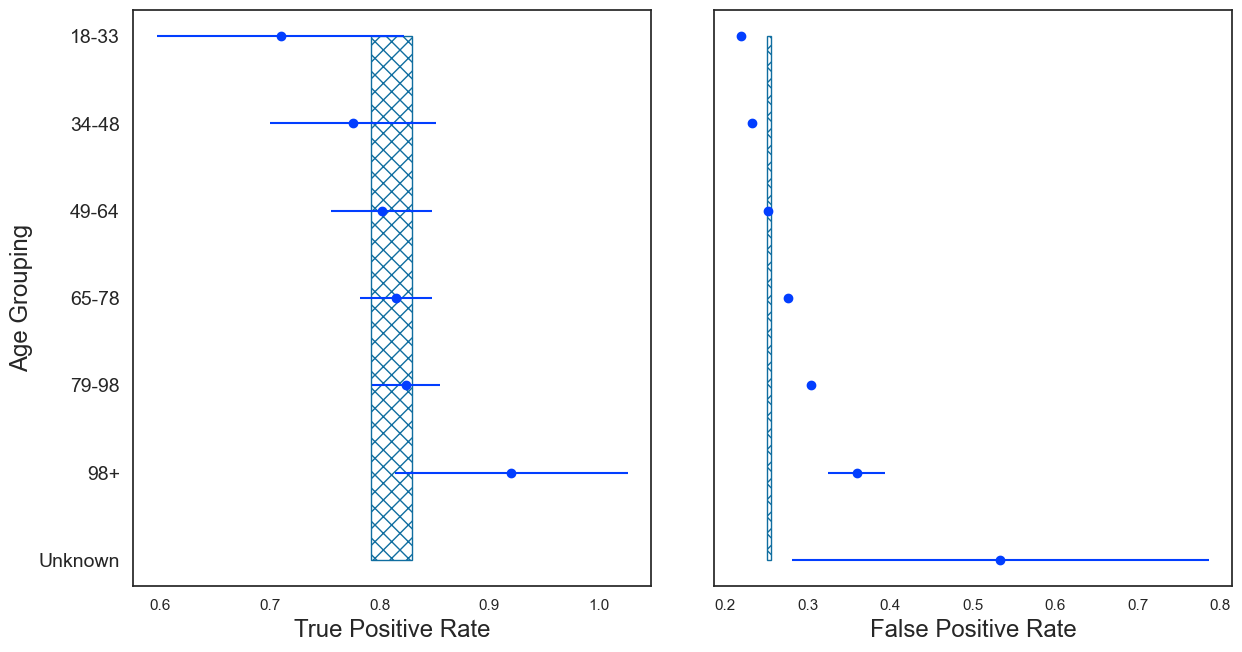

In [60]:
from matplotlib.ticker import MaxNLocator

if groupBy =='GENDERCODE':
    try:
        summary_df.drop(['Indeterminate', 'Unknown', ], inplace=True)
    except:
        pass

print( "True Positive Rate  = ({:.2f} \u00B1 {:.2f})%".format(100*TPRate,100*DeltaTPRate))
tmp_df = summary_df.reset_index()
sizeY = (len(tmp_df.index)-1)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(5.9*2, 8.6*0.75))
fig.tight_layout() 

tp = sns.scatterplot(data=tmp_df, x='True Positive Rate',y=groupBy , ax=axs[0])

axs[0].errorbar(tmp_df['True Positive Rate'], tmp_df[groupBy], xerr=tmp_df['Delta True Positive Rate'], fmt='o')
axs[0].grid(False)
x1 = TPRate-DeltaTPRate
x2 = TPRate+DeltaTPRate
# y = np.arange(0,axs[0].get_ylim()[1],0.01)
axs[0].add_patch(plt.Rectangle( (x1,0), 2*DeltaTPRate,sizeY,hatch='xx',fill=None,edgecolor= "#106EA0"))
if groupBy=='HOSIPTALPROXY':
    axs[0].set_ylabel('Hospital',fontsize='x-large')
if groupBy == 'IndiginousFlag':
    axs[0].set_ylabel('Indigenous',fontsize='x-large')
    axs[0].yaxis.set_ticks([0,1])
    axs[0].yaxis.set_ticklabels(['False','True'],fontsize='large')
    # tp.set_yticklabels( ['','False','True',''],)
if groupBy == 'GENDERCODE':
    axs[0].set_ylabel('Gender',fontsize='x-large')
    axs[0].yaxis.set_ticks([0,1])

    axs[0].yaxis.set_ticklabels(['Female','Male'],fontsize='large')
    # tp.set_yticklabels( ['','False','True',''],)
    
if groupBy == 'age_range':
    axs[0].set_ylabel('Age Grouping',fontsize='x-large')
    axs[0].tick_params(axis='y', labelsize=14)

axs[0].set_xlabel('True Positive Rate',fontsize='x-large')

    
print(tp.get_yticklabels())  
fp = sns.scatterplot(data=tmp_df, x='False Positive Rate',y=groupBy , ax=axs[1])
# fp.set(xlim=(0.10,0.30))
print(fp.get_yticklabels())

axs[1].errorbar(tmp_df['False Positive Rate'], tmp_df[groupBy], xerr=tmp_df['Delta False Positive Rate'], fmt='o')
axs[1].grid(False)
x1 = FPRate-DeltaFPRate
x2 = FPRate+DeltaFPRate
# y = np.arange(0,axs[0].get_ylim()[1],0.01)
axs[1].add_patch(plt.Rectangle( (x1,0), 2*DeltaFPRate,sizeY,hatch='xx',fill=None,edgecolor= "#106EA0"))
# if groupBy=='HOSIPTALPROXY':
axs[1].set(ylabel='')
if groupBy == 'IndiginousFlag':
    # ax = plt.figure().gca()
    # axs[1].yaxis.set_major_locator(MaxNLocator(integer=True))
    axs[1].yaxis.set_ticks([0,1])
    axs[1].yaxis.set_ticklabels(['',''],fontsize='large')
if groupBy == 'GENDERCODE':
    axs[1].yaxis.set_ticks([0,1])
    axs[1].yaxis.set_ticklabels(['',''],fontsize='large')
    # tp.set_yticklabels( ['','False','True',''],)
if groupBy == 'age_range':
    # axs[0].set_ylabel('Age Grouping',fontsize='x-large')
    # axs[1].get_xticklabels()
    nticks = (len(axs[1].get_yticklabels()))
    axs[1].yaxis.set_ticklabels(['']*nticks)
axs[1].set_xlabel('False Positive Rate',fontsize='x-large')




Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
 18-33  34-48   0.0662 0.8914 -0.1095 0.2419  False
 18-33  49-64   0.0924  0.541 -0.0639 0.2487  False
 18-33  65-78   0.1055 0.3369 -0.0442 0.2552  False
 18-33  79-98   0.1146 0.2421 -0.0346 0.2637  False
 18-33    98+   0.2103 0.2077 -0.0542 0.4749  False
 34-48  49-64   0.0262 0.9904 -0.0966  0.149  False
 34-48  65-78   0.0393  0.924  -0.075 0.1535  False
 34-48  79-98   0.0484 0.8291 -0.0651 0.1618  False
 34-48    98+   0.1441 0.5518 -0.1021 0.3904  False
 49-64  65-78   0.0131 0.9975 -0.0684 0.0945  False
 49-64  79-98   0.0221 0.9699 -0.0582 0.1025  False
 49-64    98+   0.1179 0.6993 -0.1149 0.3507  False
 65-78  79-98   0.0091 0.9989 -0.0575 0.0757  False
 65-78    98+   0.1048 0.7799 -0.1236 0.3333  False
 79-98    98+   0.0958 0.8379 -0.1323 0.3238  False
---------------------------------------------------
Multiple Com

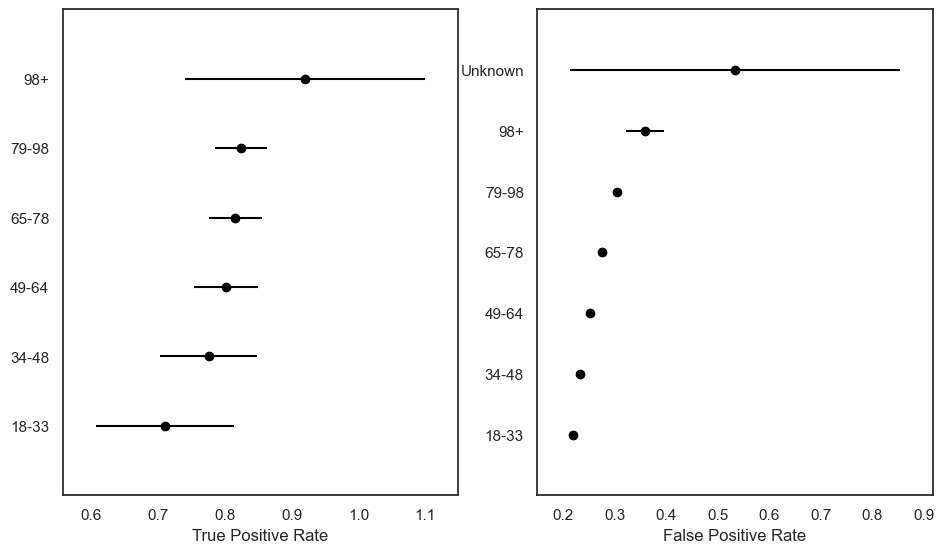

In [63]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf 

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(5.9*2, 8.6*0.75))

# f.tight_layout() 

item = 'MLFlag'
tmp_df = Emergency_IPInfo_Complete_Numeric_tmp[Emergency_IPInfo_Complete_Numeric_tmp[DiagnosisString]==1].copy() # summary_PD_First_df.loc[~summary_PD_First_df[item].isna()].copy()

tukey = pairwise_tukeyhsd(endog=tmp_df[item],     # Data
                          groups=tmp_df[groupBy],   # Groups
                          alpha=0.05)  

tukey.plot_simultaneous(xlabel='True Positive Rate',ax=axs[0])    # Plot group confidence intervals
axs[0].title.set_text('')
axs[0].grid(False)
print(tukey.summary())

item = 'MLFlag'
tmp2_df = Emergency_IPInfo_Complete_Numeric_tmp[Emergency_IPInfo_Complete_Numeric_tmp[DiagnosisString]==0].copy() # summary_PD_First_df.loc[~summary_PD_First_df[item].isna()].copy()

tukey = pairwise_tukeyhsd(endog=tmp2_df[item],     # Data
                          groups=tmp2_df[groupBy],   # Groups
                          alpha=0.05)  

tukey.plot_simultaneous(xlabel='False Positive Rate',ax=axs[1])    # Plot group confidence intervals
axs[1].title.set_text('')
axs[1].grid(False)


print(tukey.summary())

In [17]:
# tukey.pvalues

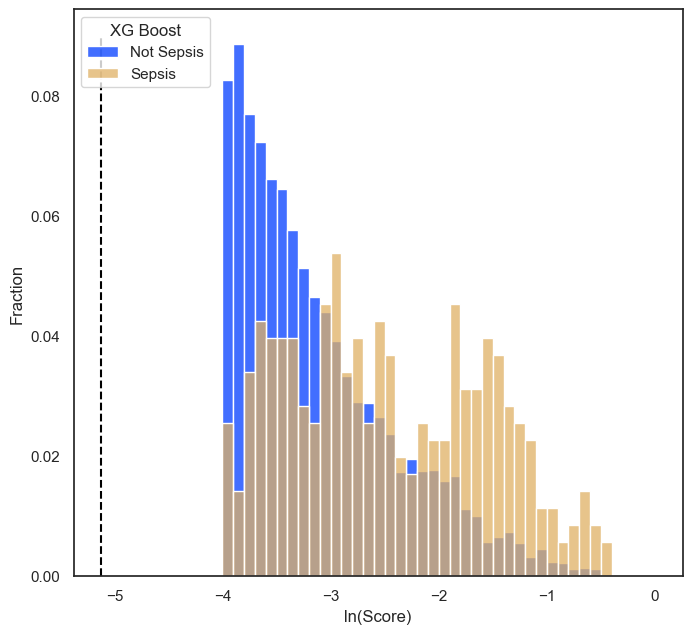

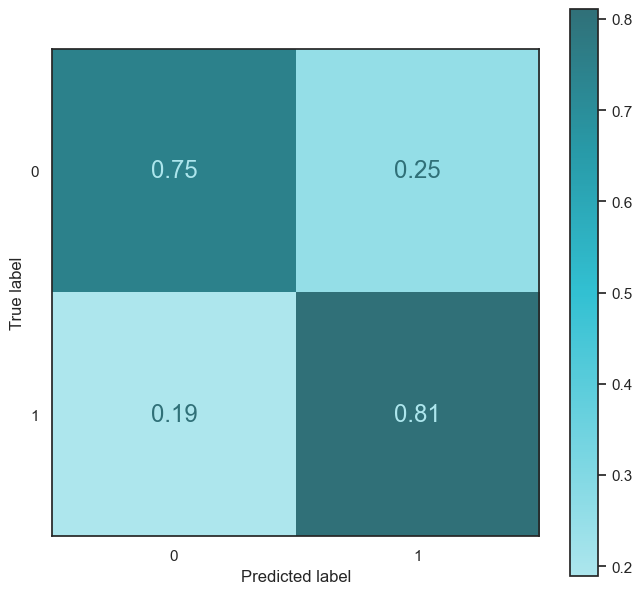

In [64]:
# yprobs2 = np.ravel(yprobs,order='c') 

compareResults = pd.DataFrame({DiagnosisString:y_verification_2, "Prob":y_verification_probs2})
compareResults.describe()


ResultsFlag0 = compareResults.loc[compareResults[DiagnosisString]==0]
ResultsFlag1 = compareResults.loc[compareResults[DiagnosisString]==1]


yprobslog2 = np.log(yprobs2) 

compareResultsLog = pd.DataFrame({DiagnosisString:y2, "Prob":yprobslog2})
#print(compareResultsLog.describe())


ResultsFlag0_xgb_log = compareResultsLog.loc[compareResultsLog[DiagnosisString]==0]
ResultsFlag1_xgb_log = compareResultsLog.loc[compareResultsLog[DiagnosisString]==1]
fig, ax = plt.subplots(figsize=(7, 7))

if ModelChoice == 'RF':

    sns.histplot(data=ResultsFlag0, x="Prob",  binrange=[0.,1.], binwidth=0.025, stat = 'probability', color= "#E0B165", label='Not {}'.format(Diagnosis))
    sns.histplot(data=ResultsFlag1, x="Prob",  binrange=[0.,1.], binwidth=0.025,  stat = 'probability' , label='{}'.format(Diagnosis))
    plt.legend(loc=1, title="{}".format(tmpString))

    y = np.arange(0.,ax.get_ylim()[1],0.01)
    # print(len(y))
    x =  np.full(shape = len(y), fill_value = threshold)

    plt.plot(x,y,label='chance (auc=0.5)',color='k',linestyle='--')

    fig.patch.set_facecolor('white')
    plt.ylabel("Fraction")
    plt.xlabel("Score")
else: 
    sns.histplot(data=ResultsFlag0_xgb_log, x="Prob",  binrange=[-4,0.], binwidth=0.1, stat = 'probability',label='Not {}'.format(Diagnosis))
    sns.histplot(data=ResultsFlag1_xgb_log, x="Prob",  binrange=[-4,0.], binwidth=0.1,  stat = 'probability',  color= "#E0B165" , label='{}'.format(Diagnosis))
    plt.legend(loc=2,  title="XG Boost")
    plt.ylabel("Fraction")

    y = np.arange(0.,ax.get_ylim()[1],0.01)
    #print(len(y))
    x =  np.full(shape = len(y), fill_value = np.log(threshold))

    plt.plot(x,y,label='chance (auc=0.5)',color='k',linestyle='--')
    plt.ylabel("Fraction")
    plt.xlabel("ln(Score)")
plt.savefig("Figures/Verfification_{}_{}_Score_Plot.png".format(DiagnosisString,tmpString), dpi=300, bbox_inches = "tight")



y_verification_preds2 = np.where(y_verification_probs2<threshold,0,1)

# fig, ax = plt.subplots(figsize=(7, 7))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_verification_2, y_verification_preds2, normalize='true')
    )
fig, ax = plt.subplots(figsize=(7,7))
cmp.plot(cmap=cmap_blended, ax=ax, text_kw={'fontsize':'x-large'})
ax.grid(False)

plt.savefig("Figures/Verification_{}_{}_Confusion_Matrix_Plot.png".format(DiagnosisString,tmpString), dpi=300, bbox_inches = "tight")

plt.show()




best_model[1].feature_importances_
feat_importances=pd.Series(best_model[1].feature_importances_ , index=all_cols)
feat_importances=pd.DataFrame(feat_importances).reset_index()

feat_importances.columns=['feature', 'feature_importance']



feat_importances.sort_values('feature_importance', ascending=False, inplace=True)

feat_importances['name'] = None
idx = feat_importances.index




for i in idx:
    # print(i)

    val = feat_importances.loc[i].feature
    # print(i,val)
    try:
        tmpValue = plotSettings[val][4]
        end = tmpValue.rfind(' [')
        # print(end)
        if (end > 0): 
            feat_importances.at[i,'name']= tmpValue[0:tmpValue.rfind(' [')]
        else:
            feat_importances.at[i,'name']= tmpValue
    except: 
        for item9 in OtherValues.keys():
            if val == item9:
                feat_importances.at[i,'name'] = OtherValues[item9]
        
        # if val == 'TriageCategory_2':
        #     feat_importances.at[i,'name']= 'Triage Category 2'
        # else:
        #     print(val)
# print(feat_importances)



In [65]:
print(len(X_verification.index))
indiginous_idx = Emergency_IPInfo_Complete_Numeric_tmp.loc[Emergency_IPInfo_Complete_Numeric_tmp.IndiginousFlag==1].index

X_valid_idx = X_verification.index
index_choice = indiginous_idx.intersection(X_valid_idx)
X_indiginous_verification = X_verification.loc[index_choice].copy()
print(len(X_indiginous_verification))
print(100.*len(X_indiginous_verification)/len(X_verification.index))

164320
8440
5.136319376825706


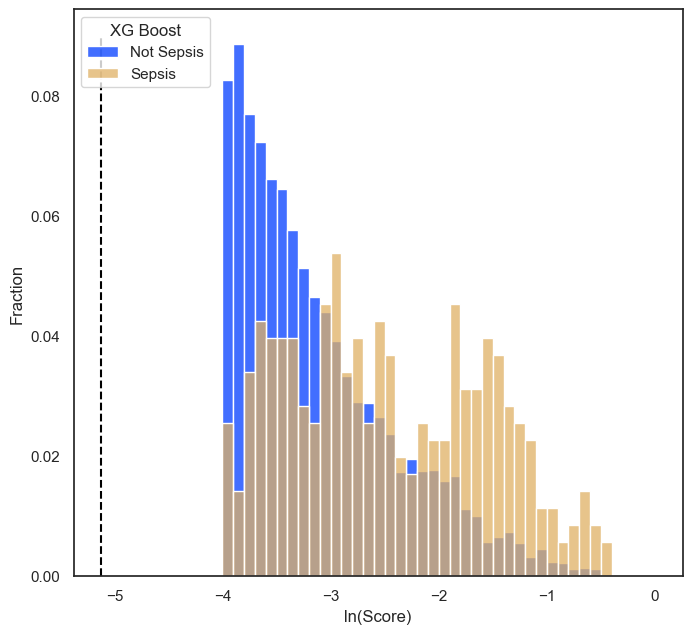

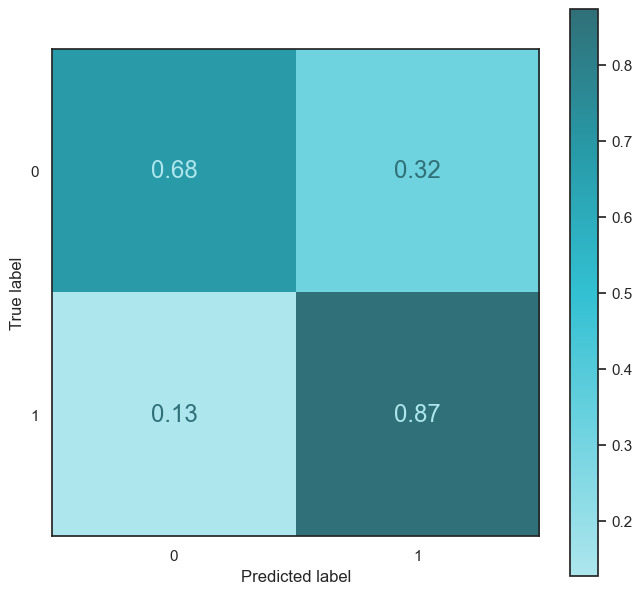

In [66]:
# fpr, tpr, thresholds = roc_curve(y_valid, yprobs)
# auc = roc_auc_score(y_valid, yprobs)
# plt.plot(fpr,tpr,label="Sepsis (RF, unoptimised), area="+str('{:.3f}'.format(auc)))


# x = np.arange(0,1,0.01)
# plt.plot(x,x,label='chance (auc=0.5)',color='k',linestyle='--')

# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.legend(loc=4)

# plt.show()

# import math
# def find_nearest(array,value):
#     idx = np.searchsorted(array, value, side="left")
#     if idx > 0 and (idx == len(array) or math.fabs(value - array[idx-1]) < math.fabs(value - array[idx])):
#         return array[idx-1],idx-1
#     else:
#         return array[idx],idx

# val,idx = find_nearest(tpr,0.85)
# print(tpr[idx],fpr[idx],thresholds[idx])
y_verification_preds=best_model.predict (X_indiginous_verification)

y_verification_preds_proba=best_model.predict_proba (X_indiginous_verification)
y_verification_probs = np.delete(y_verification_preds_proba,[0],1)
y_verification_probs2 = np.ravel(y_verification_probs,order='c') 

y_verification_2=np.ravel(y_verification.loc[index_choice],order='c')

# yprobs2 = np.ravel(yprobs,order='c') 

compareResults = pd.DataFrame({DiagnosisString:y_verification_2, "Prob":y_verification_probs2})
compareResults.describe()


ResultsFlag0 = compareResults.loc[compareResults[DiagnosisString]==0]
ResultsFlag1 = compareResults.loc[compareResults[DiagnosisString]==1]


yprobslog2 = np.log(yprobs2) 

compareResultsLog = pd.DataFrame({DiagnosisString:y2, "Prob":yprobslog2})
#print(compareResultsLog.describe())


ResultsFlag0_xgb_log = compareResultsLog.loc[compareResultsLog[DiagnosisString]==0]
ResultsFlag1_xgb_log = compareResultsLog.loc[compareResultsLog[DiagnosisString]==1]
fig, ax = plt.subplots(figsize=(7, 7))

if ModelChoice == 'RF':

    sns.histplot(data=ResultsFlag0, x="Prob",  binrange=[0.,1.], binwidth=0.025, stat = 'probability', color= "#E0B165", label='Not {}'.format(Diagnosis))
    sns.histplot(data=ResultsFlag1, x="Prob",  binrange=[0.,1.], binwidth=0.025,  stat = 'probability' , label='{}'.format(Diagnosis))
    plt.legend(loc=1, title="{}".format(tmpString))

    y = np.arange(0.,ax.get_ylim()[1],0.01)
    # print(len(y))
    x =  np.full(shape = len(y), fill_value = threshold)

    plt.plot(x,y,label='chance (auc=0.5)',color='k',linestyle='--')

    fig.patch.set_facecolor('white')
    plt.ylabel("Fraction")
    plt.xlabel("Score")
else: 
    sns.histplot(data=ResultsFlag0_xgb_log, x="Prob",  binrange=[-4,0.], binwidth=0.1, stat = 'probability',label='Not {}'.format(Diagnosis))
    sns.histplot(data=ResultsFlag1_xgb_log, x="Prob",  binrange=[-4,0.], binwidth=0.1,  stat = 'probability',  color= "#E0B165" , label='{}'.format(Diagnosis))
    plt.legend(loc=2,  title="XG Boost")
    plt.ylabel("Fraction")

    y = np.arange(0.,ax.get_ylim()[1],0.01)
    #print(len(y))
    x =  np.full(shape = len(y), fill_value = np.log(threshold))

    plt.plot(x,y,label='chance (auc=0.5)',color='k',linestyle='--')
    plt.ylabel("Fraction")
    plt.xlabel("ln(Score)")
plt.savefig("Figures/Verfification_{}_{}_Score_Plot.png".format(DiagnosisString,tmpString), dpi=300, bbox_inches = "tight")



y_verification_preds2 = np.where(y_verification_probs2<threshold,0,1)

# fig, ax = plt.subplots(figsize=(7, 7))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_verification_2, y_verification_preds2, normalize='true')
    )
fig, ax = plt.subplots(figsize=(7,7))
cmp.plot(cmap=cmap_blended, ax=ax, text_kw={'fontsize':'x-large'})
ax.grid(False)

plt.savefig("Figures/Verification_{}_{}_Confusion_Matrix_Plot.png".format(DiagnosisString,tmpString), dpi=300, bbox_inches = "tight")

plt.show()



In [21]:
# Emergency_IPInfo_Complete_Numeric[['MLFlag',DiagnosisString,'GENDERCODE','IndiginousFlag','HOSIPTALPROXY']]  #.groupby('IndiginousFlag').sum()

## Gender

In [67]:
print("Diagnosis being investigated = {}".format(DiagnosisString))
print("Total Number of female Cases = {}".format(len(Emergency_IPInfo_Complete_Numeric_tmp.loc[Emergency_IPInfo_Complete_Numeric_tmp.GENDERCODE=='Female'].index)))
print("Number of {} Cases ".format(DiagnosisString),len(Emergency_IPInfo_Complete_Numeric_tmp[(Emergency_IPInfo_Complete_Numeric_tmp[DiagnosisString]==1) & (Emergency_IPInfo_Complete_Numeric_tmp.GENDERCODE=='Female')]))


Diagnosis being investigated = SepsisFlag
Total Number of female Cases = 90156
Number of SepsisFlag Cases  780


In [68]:
print(len(X_verification.index))
female_idx = Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.GENDERCODE=='Female'].index

X_valid_idx = X_verification.index
index_choice = female_idx.intersection(X_valid_idx)
X_female_verification = X_verification.loc[index_choice].copy()
print(len(X_female_verification))
print(100.*len(X_female_verification)/len(X_verification.index))

164320
90156
54.86611489776047


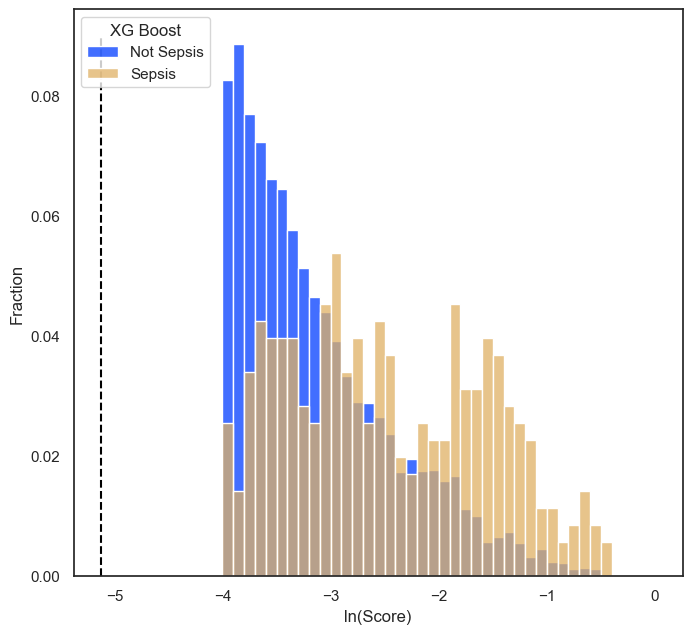

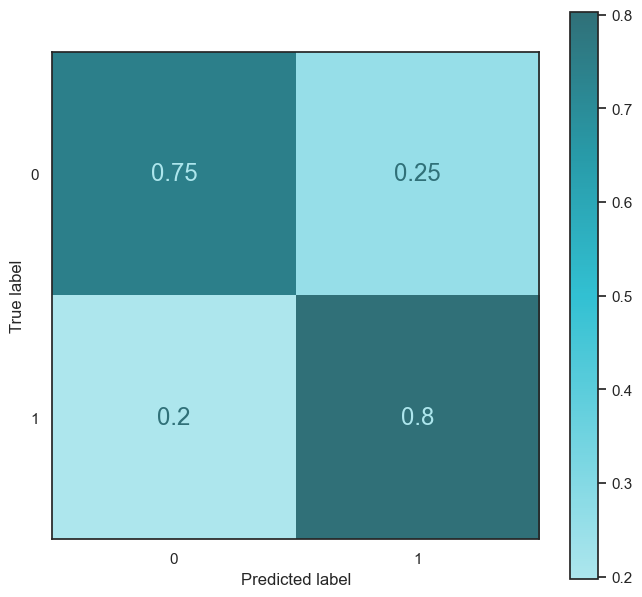

In [69]:
y_verification_preds=best_model.predict (X_female_verification)

y_verification_preds_proba=best_model.predict_proba (X_female_verification)
y_verification_probs = np.delete(y_verification_preds_proba,[0],1)
y_verification_probs2 = np.ravel(y_verification_probs,order='c') 

y_verification_2=np.ravel(y_verification.loc[index_choice],order='c')

# yprobs2 = np.ravel(yprobs,order='c') 

compareResults = pd.DataFrame({DiagnosisString:y_verification_2, "Prob":y_verification_probs2})
compareResults.describe()


ResultsFlag0 = compareResults.loc[compareResults[DiagnosisString]==0]
ResultsFlag1 = compareResults.loc[compareResults[DiagnosisString]==1]


yprobslog2 = np.log(yprobs2) 

compareResultsLog = pd.DataFrame({DiagnosisString:y2, "Prob":yprobslog2})
#print(compareResultsLog.describe())


ResultsFlag0_xgb_log = compareResultsLog.loc[compareResultsLog[DiagnosisString]==0]
ResultsFlag1_xgb_log = compareResultsLog.loc[compareResultsLog[DiagnosisString]==1]
fig, ax = plt.subplots(figsize=(7, 7))

if ModelChoice == 'RF':

    sns.histplot(data=ResultsFlag0, x="Prob",  binrange=[0.,1.], binwidth=0.025, stat = 'probability', color= "#E0B165", label='Not {}'.format(Diagnosis))
    sns.histplot(data=ResultsFlag1, x="Prob",  binrange=[0.,1.], binwidth=0.025,  stat = 'probability' , label='{}'.format(Diagnosis))
    plt.legend(loc=1, title="{}".format(tmpString))

    y = np.arange(0.,ax.get_ylim()[1],0.01)
    # print(len(y))
    x =  np.full(shape = len(y), fill_value = threshold)

    plt.plot(x,y,label='chance (auc=0.5)',color='k',linestyle='--')

    fig.patch.set_facecolor('white')
    plt.ylabel("Fraction")
    plt.xlabel("Score")
else: 
    sns.histplot(data=ResultsFlag0_xgb_log, x="Prob",  binrange=[-4,0.], binwidth=0.1, stat = 'probability',label='Not {}'.format(Diagnosis))
    sns.histplot(data=ResultsFlag1_xgb_log, x="Prob",  binrange=[-4,0.], binwidth=0.1,  stat = 'probability',  color= "#E0B165" , label='{}'.format(Diagnosis))
    plt.legend(loc=2,  title="XG Boost")
    plt.ylabel("Fraction")

    y = np.arange(0.,ax.get_ylim()[1],0.01)
    #print(len(y))
    x =  np.full(shape = len(y), fill_value = np.log(threshold))

    plt.plot(x,y,label='chance (auc=0.5)',color='k',linestyle='--')
    plt.ylabel("Fraction")
    plt.xlabel("ln(Score)")
plt.savefig("Figures/Verfification_{}_{}_Score_Plot.png".format(DiagnosisString,tmpString), dpi=300, bbox_inches = "tight")



y_verification_preds2 = np.where(y_verification_probs2<threshold,0,1)

# fig, ax = plt.subplots(figsize=(7, 7))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_verification_2, y_verification_preds2, normalize='true')
    )
fig, ax = plt.subplots(figsize=(7,7))
cmp.plot(cmap=cmap_blended, ax=ax, text_kw={'fontsize':'x-large'})
ax.grid(False)

plt.savefig("Figures/Verification_{}_{}_Confusion_Matrix_Plot.png".format(DiagnosisString,tmpString), dpi=300, bbox_inches = "tight")

plt.show()



In [70]:
accuracy  =accuracy_score(y_verification_2,y_verification_preds2)
balanced_accuracy = balanced_accuracy_score (y_verification_2,y_verification_preds2)
recall  =recall_score(y_verification_2,y_verification_preds2)
precision = precision_score(y_verification_2,y_verification_preds2)
f1 = f1_score(y_verification_2,y_verification_preds2)


print(" Accuracy = \t\t{:0.2f}".format(accuracy))
print(" Balanced Accuracy = \t{:0.2f}".format(balanced_accuracy))
print(" Recall = \t\t{:0.2f}".format(recall))
print(" Precsiion = \t\t{:0.2f}".format(precision))
print(" F1 = \t\t\t{:0.2f}".format(f1))

 Accuracy = 		0.75
 Balanced Accuracy = 	0.77
 Recall = 		0.80
 Precsiion = 		0.03
 F1 = 			0.05


In [71]:
print(feat_importances)

                     feature  feature_importance                    name
3           FirstRespiration            0.294649        Respiration Rate
0            FirstBPSystolic            0.239599             BP Systolic
5   FirstTemperatureDegreesC            0.169351             Temperature
1  FirstLevelofConsciousness            0.113586  Level of Consciousness
4                  FirstSpO2            0.101206      O$_{2}$ Saturation
2          FirstPulseRateBPM            0.081610              Pulse Rate


In [27]:
from pandas.api.types import is_numeric_dtype

color_dict = {1: to_rgba("#32C0D2", 1),
                0: to_rgba("#E0B165",1),}

6
['Normal Results', 'Respiration Rate', 'Respiration Rate']
['Normal Results', 'Temperature [$^\\circ$C]', 'Temperature [$^\\circ$C]']
['Normal Results', 'BP Systolic [mm Hg]', 'BP Systolic [mm Hg]']
['Normal Results', 'Pulse Rate', 'Pulse Rate']
['Normal Results', 'O$_{2}$ Saturation [%]', 'O$_{2}$ Saturation [%]']
['Normal Results', 'Level of Consciousness', 'Level of Consciousness']


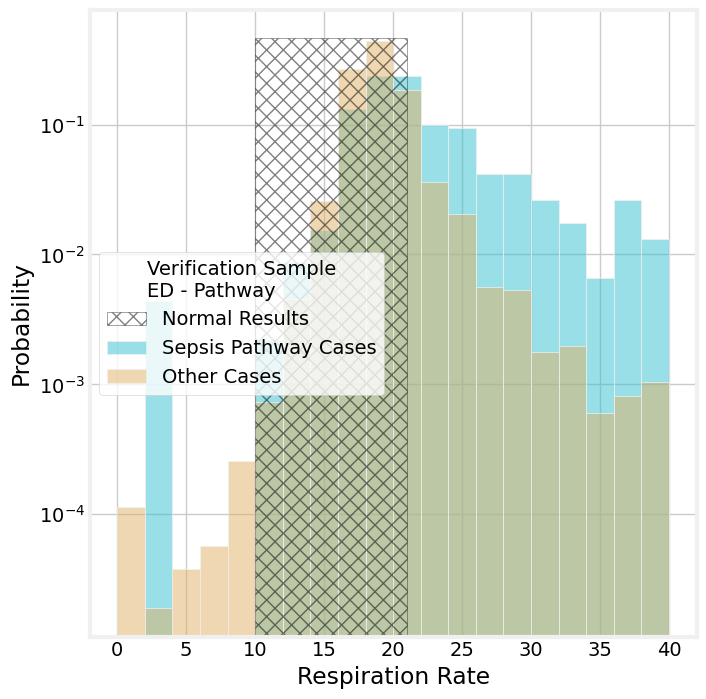

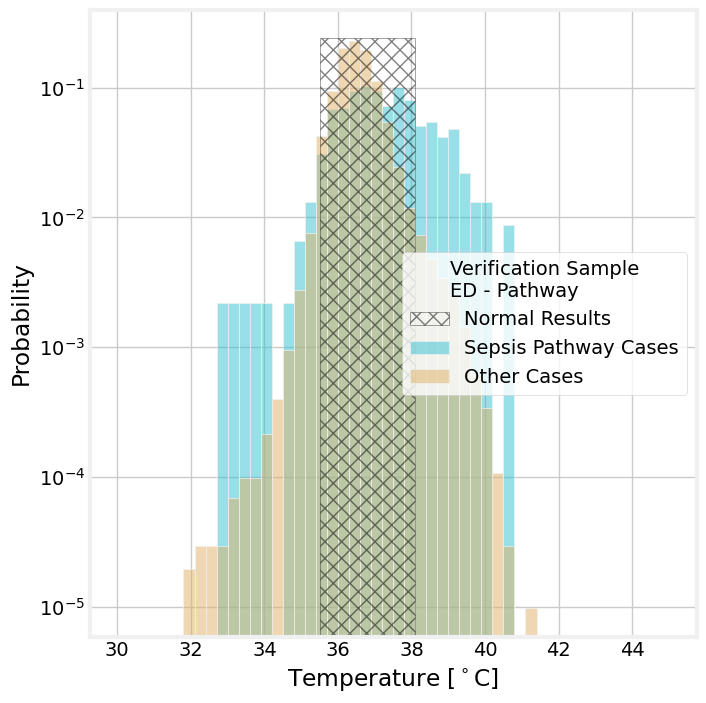

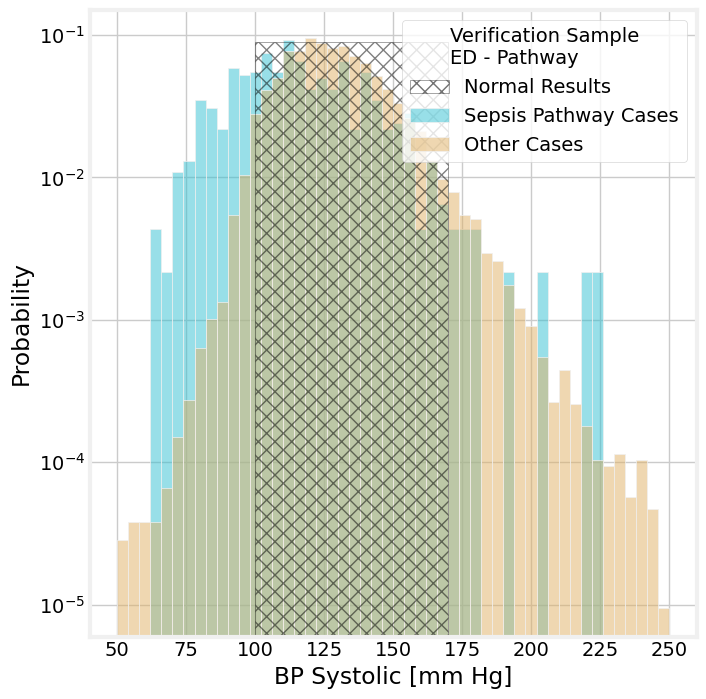

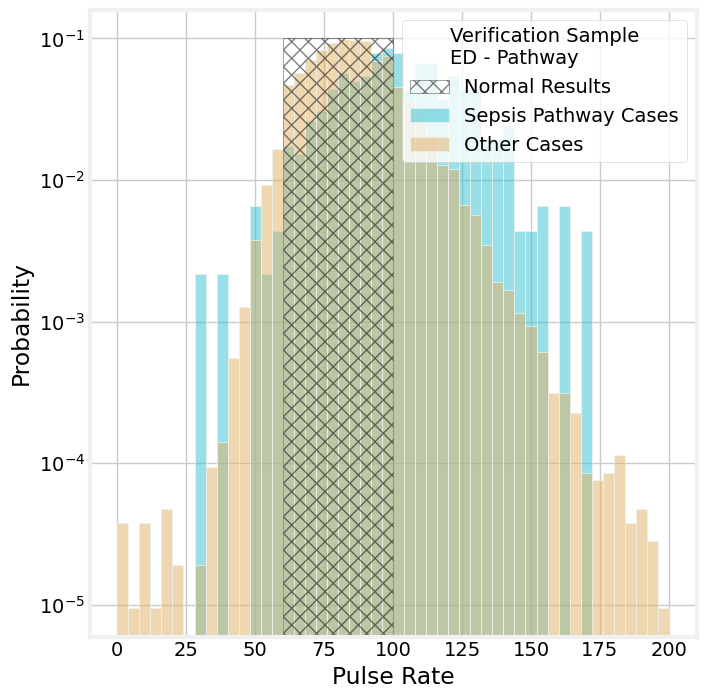

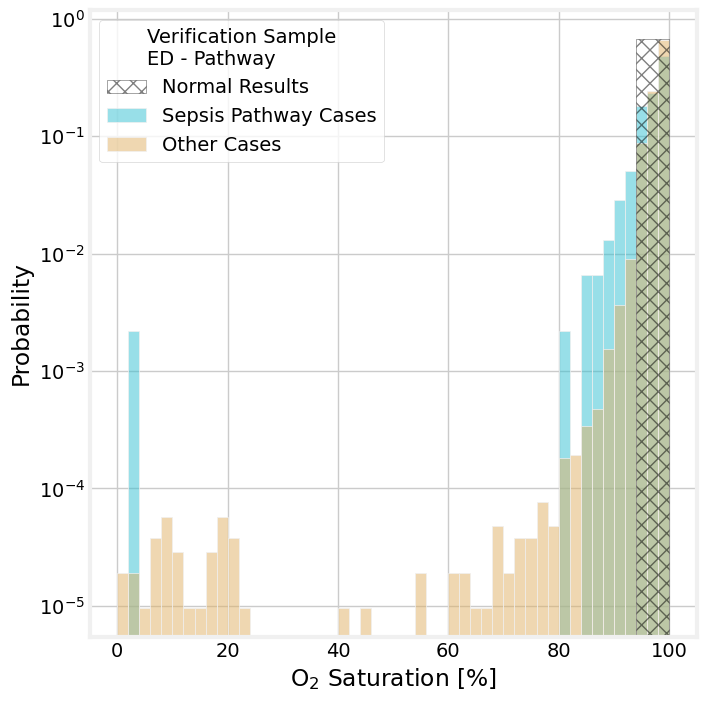

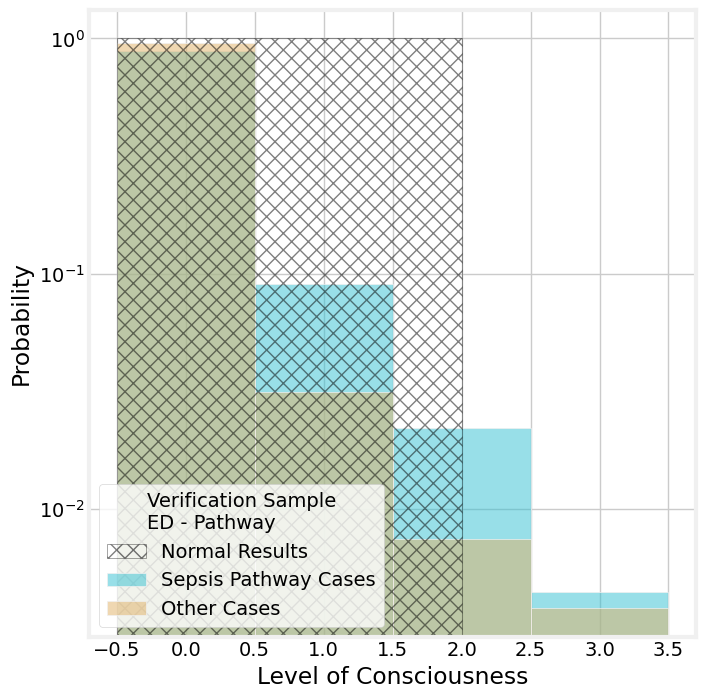

In [28]:
n_features = len(feat_importances.index)
n_features = min(n_features,10)
print(n_features)
for i in range(n_features): 
    item = feat_importances.feature.values[i]
    # print(i,item,X_valid[item].dtype,is_numeric_dtype(X_valid[item]))
    if item in X_valid.keys():
        if is_numeric_dtype(X_valid[item]):
            fig, ax = plt.subplots(figsize=(7, 7))
            fig.tight_layout() 
            plotSettingValues = plotSettings[item]
            
            hist = sns.histplot(data=Emergency_IPInfo_Complete_Numeric_tmp.loc[~Emergency_IPInfo_Complete_Numeric_tmp[item].isna()], x=item,  stat= 'probability', bins=plotSettingValues[0], 
                label=plotSettingValues[4] , hue=DiagnosisString, palette={1: to_rgba("#32C0D2", 1), 0: to_rgba("#E0B165",1),}, #  color_dict,
                binrange=(plotSettingValues[1], plotSettingValues[2]), alpha=0.5, common_norm=False,)

            if plotSettingValues[5]:
                x1 = plotSettingValues[6]
                x2 = plotSettingValues[7]
                y = np.arange(0,ax.get_ylim()[1],0.01)
                ax.fill_betweenx(y,x1,x2, facecolor='none', edgecolor='black', hatch='xx',alpha=0.5, label='Normal Results')

            # print(hist.get_ylim())
            handles, labels  =  ax.get_legend_handles_labels()
            print(labels)
            if plotSettingValues[5]:
                ax.legend(handles, [ 'Normal Results', '{} Cases'.format(PlotString), 'Other Cases' ], loc='best',  title='Verification Sample\nED - Pathway',alignment='center')
            else: 
                ax.legend(handles, ['{} Cases'.format(PlotString), 'Other Cases' ],  loc='best',  title='Verification Sample\nED - Pathway',alignment='center')
            
            hist.plot()
            
            # print(ax.get_ylim())
            ax.set(xlabel=plotSettingValues[4])
            plt.yscale(plotSettingValues[3])

['Pain Assessment', 'Pain Assessment']


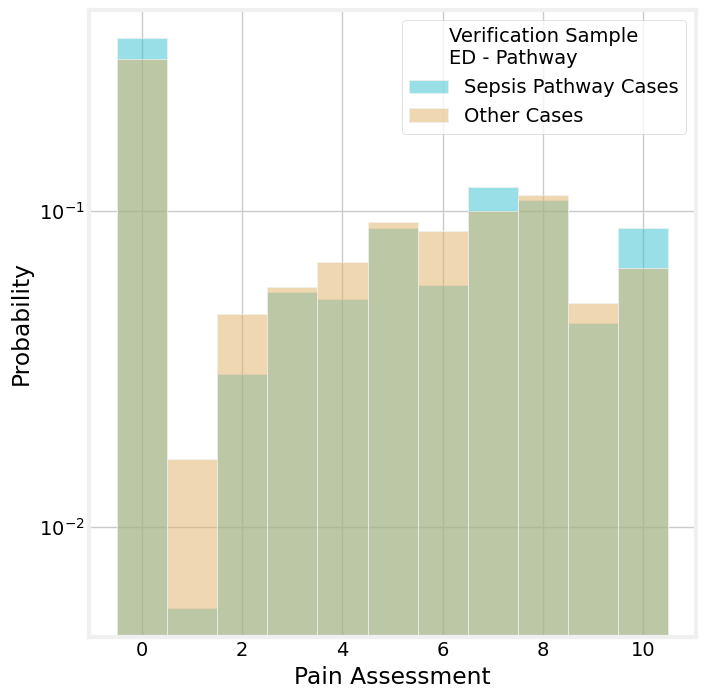

In [29]:
# for i in range(n_features): 
item =  'FirstPainAssessment'  # feat_importances.feature.values[i]
# print(i,item,X_valid[item].dtype,is_numeric_dtype(X_valid[item]))
#if item in X_valid.keys():
# if is_numeric_dtype(X_valid[item]):
fig, ax = plt.subplots(figsize=(7, 7))
fig.tight_layout() 
plotSettingValues = plotSettings[item]

hist = sns.histplot(data=Emergency_IPInfo_Complete_Numeric_tmp.loc[~Emergency_IPInfo_Complete_Numeric_tmp[item].isna()], x=item,  stat= 'probability', bins=plotSettingValues[0], 
    label=plotSettingValues[4] , hue=DiagnosisString,palette={1: to_rgba("#32C0D2", 1), 0: to_rgba("#E0B165",1)}, #   color_dict,
    binrange=(plotSettingValues[1], plotSettingValues[2]), alpha=0.5,  common_norm=False,)

if plotSettingValues[5]:
    x1 = plotSettingValues[6]
    x2 = plotSettingValues[7]
    y = np.arange(0,ax.get_ylim()[1],0.01)
    ax.fill_betweenx(y,x1,x2, facecolor='none', edgecolor='black', hatch='xx',alpha=0.5, label='Normal Results')

# print(hist.get_ylim())
handles, labels  =  ax.get_legend_handles_labels()
print(labels)
if plotSettingValues[5]:
    ax.legend(handles, [ 'Normal Results', '{} Cases'.format(PlotString), 'Other Cases' ], loc='best',  title='Verification Sample\nED - Pathway',alignment='center')
else: 
    ax.legend(handles, ['{} Cases'.format(PlotString), 'Other Cases' ],  loc='best',  title='Verification Sample\nED - Pathway',alignment='center')

# print(ax.get_ylim())
ax.set(xlabel=plotSettingValues[4])
plt.yscale(plotSettingValues[3])

50 250


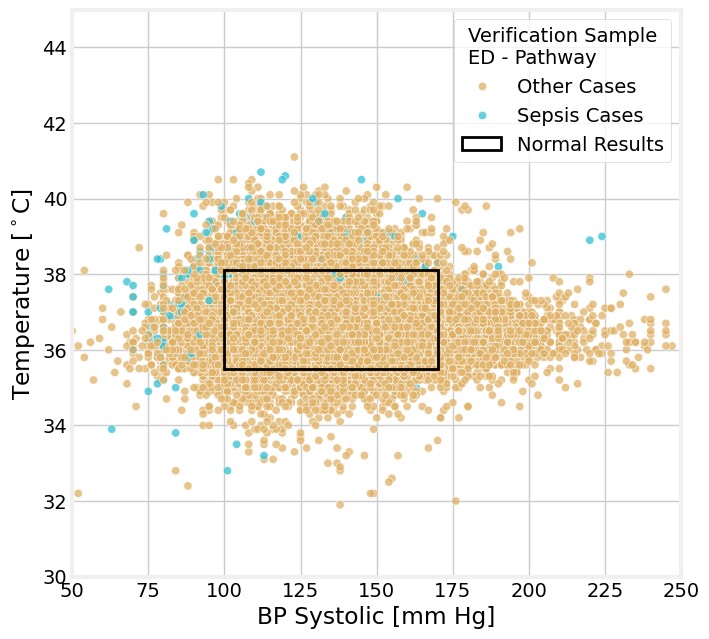

In [30]:
f, ax = plt.subplots(figsize=(7, 7))
importlib.reload(Utilities)

#xlimits = (25,250)
#ylimits = (25,45)

#fig, ax = plt.subplots()
import matplotlib.patches as patches

#ax.set_xl

xkey = 'FirstBPSystolic'
ykey='FirstTemperatureDegreesC'

g = sns.scatterplot(data=Emergency_IPInfo_Complete_Numeric_tmp, x=xkey, y=ykey ,hue=DiagnosisString, alpha=.75, palette=color_dict)
print(plotSettings[xkey][1],plotSettings[xkey][2])
ax.set_xlim(plotSettings[xkey][1],plotSettings[xkey][2])
ax.set_ylim(plotSettings[ykey][1],plotSettings[ykey][2])

ax.set(xlabel=plotSettings[xkey][4],ylabel=plotSettings[ykey][4])

patchMin = (plotSettings[xkey][6],plotSettings[ykey][6])
patchWidth = plotSettings[xkey][7] - plotSettings[xkey][6]
patchHeight = plotSettings[ykey][7] - plotSettings[ykey][6]

rect = patches.Rectangle(patchMin, patchWidth, patchHeight, linewidth=2, edgecolor='black', facecolor='none',label='Normal Results')  #alpha=0.25)
ax.add_patch(rect)

handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles, ['Other Cases', 'Sepsis Cases',  'Normal Results'], 
          loc='best',  #bbox_to_anchor=(1,1), 
          title='Verification Sample\nED - Pathway',alignment='center')

50 250


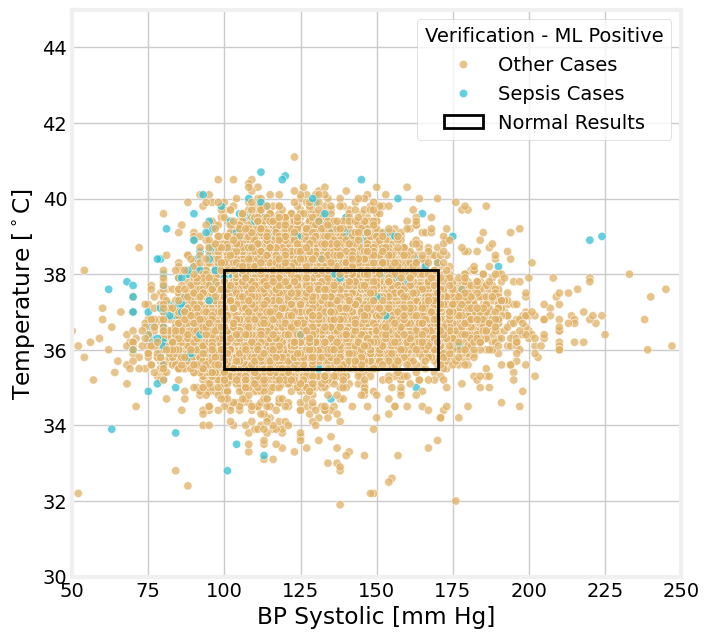

In [31]:
f, ax = plt.subplots(figsize=(7, 7))
importlib.reload(Utilities)

#xlimits = (25,250)
#ylimits = (25,45)

#fig, ax = plt.subplots()
import matplotlib.patches as patches

#ax.set_xl

xkey = 'FirstBPSystolic'
ykey='FirstTemperatureDegreesC'

g = sns.scatterplot(data=Emergency_IPInfo_Complete_Numeric_tmp[Emergency_IPInfo_Complete_Numeric_tmp.MLFlag==1], x=xkey, y=ykey ,hue=DiagnosisString, alpha=.75, palette=color_dict)
print(plotSettings[xkey][1],plotSettings[xkey][2])
ax.set_xlim(plotSettings[xkey][1],plotSettings[xkey][2])
ax.set_ylim(plotSettings[ykey][1],plotSettings[ykey][2])

ax.set(xlabel=plotSettings[xkey][4],ylabel=plotSettings[ykey][4])

patchMin = (plotSettings[xkey][6],plotSettings[ykey][6])
patchWidth = plotSettings[xkey][7] - plotSettings[xkey][6]
patchHeight = plotSettings[ykey][7] - plotSettings[ykey][6]

rect = patches.Rectangle(patchMin, patchWidth, patchHeight, linewidth=2, edgecolor='black', facecolor='none',label='Normal Results')  #alpha=0.25)
ax.add_patch(rect)

handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles, ['Other Cases', 'Sepsis Cases',  'Normal Results'], 
          loc='best',  #bbox_to_anchor=(1,1), 
          title='Verification - ML Positive',alignment='center')

50 250


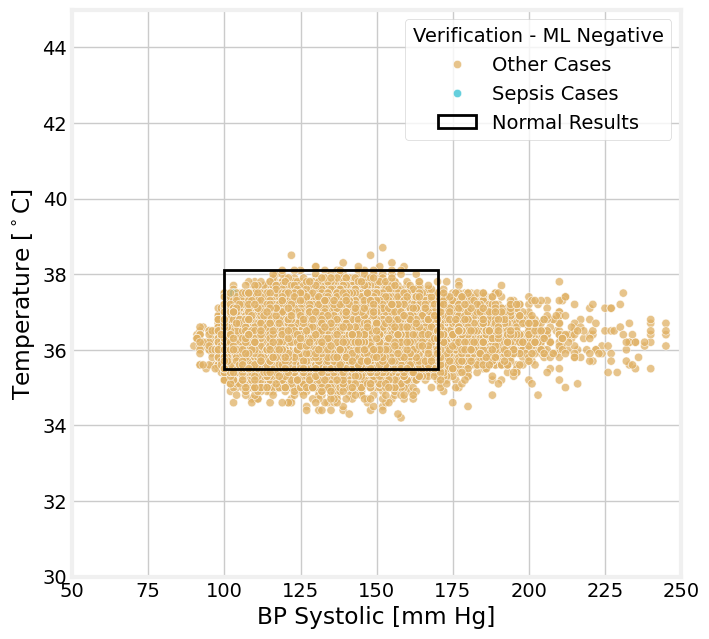

In [32]:
f, ax = plt.subplots(figsize=(7, 7))
importlib.reload(Utilities)

#xlimits = (25,250)
#ylimits = (25,45)

#fig, ax = plt.subplots()
import matplotlib.patches as patches

#ax.set_xl

xkey = 'FirstBPSystolic'
ykey='FirstTemperatureDegreesC'

g = sns.scatterplot(data=Emergency_IPInfo_Complete_Numeric_tmp[Emergency_IPInfo_Complete_Numeric_tmp.MLFlag==0], x=xkey, y=ykey ,hue=DiagnosisString, alpha=.75, palette=color_dict)
print(plotSettings[xkey][1],plotSettings[xkey][2])
ax.set_xlim(plotSettings[xkey][1],plotSettings[xkey][2])
ax.set_ylim(plotSettings[ykey][1],plotSettings[ykey][2])

ax.set(xlabel=plotSettings[xkey][4],ylabel=plotSettings[ykey][4])

patchMin = (plotSettings[xkey][6],plotSettings[ykey][6])
patchWidth = plotSettings[xkey][7] - plotSettings[xkey][6]
patchHeight = plotSettings[ykey][7] - plotSettings[ykey][6]

rect = patches.Rectangle(patchMin, patchWidth, patchHeight, linewidth=2, edgecolor='black', facecolor='none',label='Normal Results')  #alpha=0.25)
ax.add_patch(rect)

handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles, ['Other Cases', 'Sepsis Cases',  'Normal Results'], 
          loc='best',  #bbox_to_anchor=(1,1), 
          title='Verification - ML Negative',alignment='center')

6
['Normal Results', 'Respiration Rate', 'Respiration Rate']
['Normal Results', 'Temperature [$^\\circ$C]', 'Temperature [$^\\circ$C]']
['Normal Results', 'BP Systolic [mm Hg]', 'BP Systolic [mm Hg]']
['Normal Results', 'Pulse Rate', 'Pulse Rate']
['Normal Results', 'O$_{2}$ Saturation [%]', 'O$_{2}$ Saturation [%]']
['Normal Results', 'Level of Consciousness', 'Level of Consciousness']


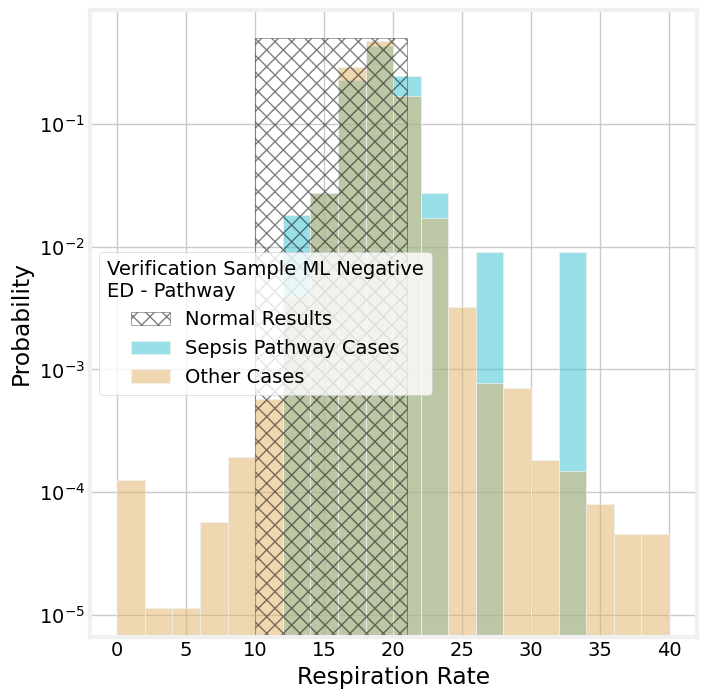

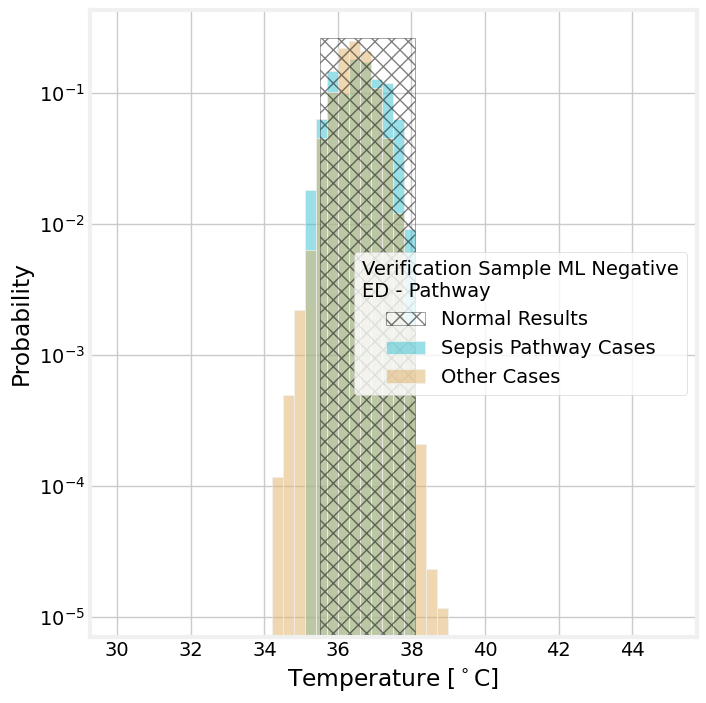

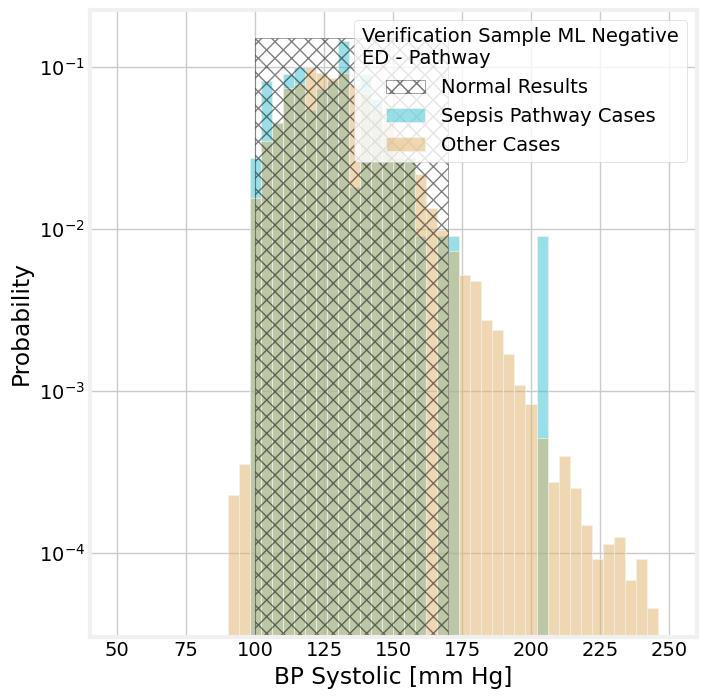

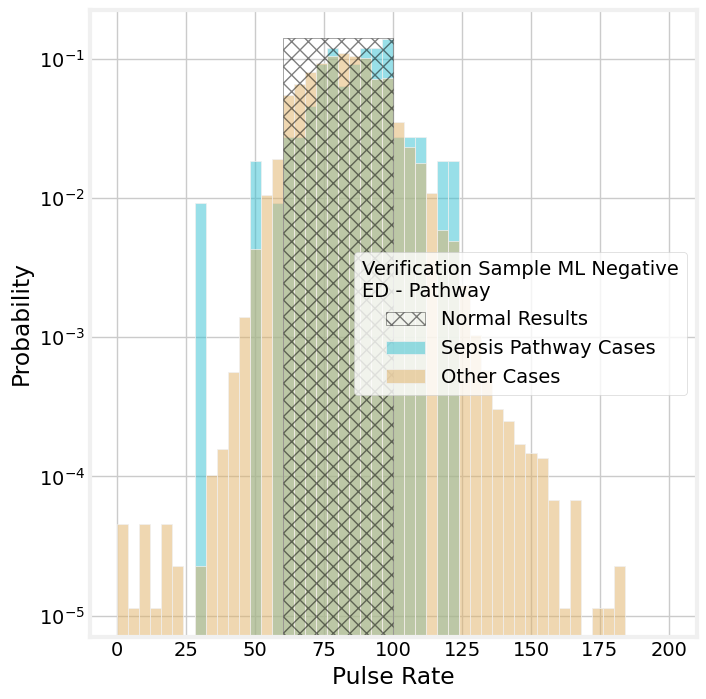

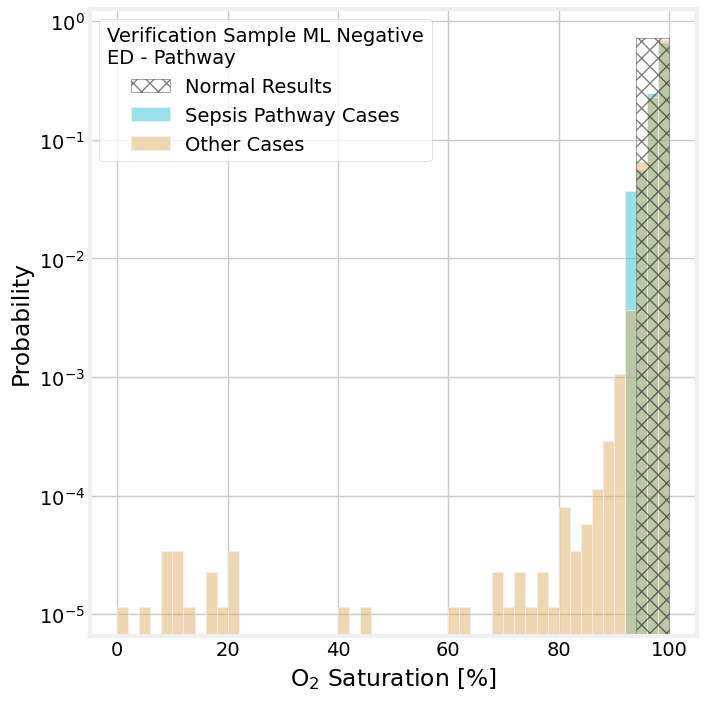

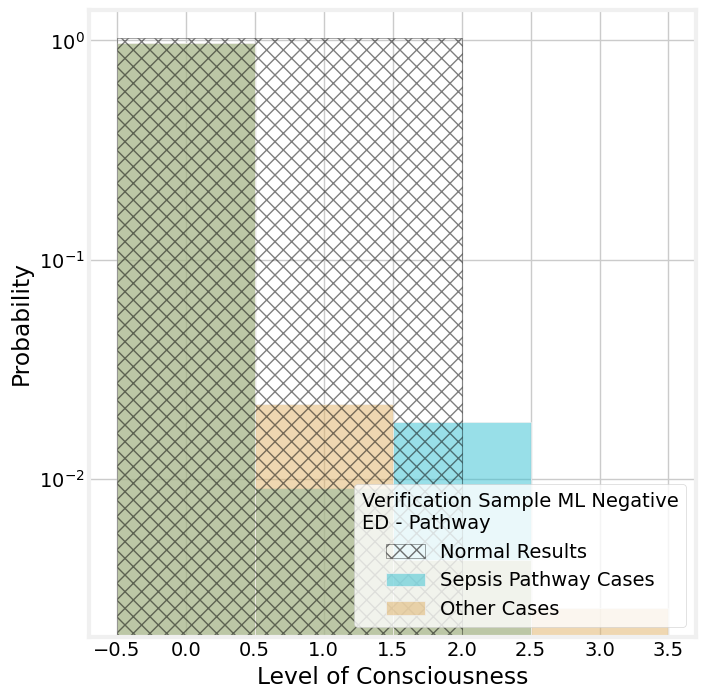

In [33]:
n_features = len(feat_importances.index)
n_features = min(n_features,10)
print(n_features)
for i in range(n_features): 
    item = feat_importances.feature.values[i]
    # print(i,item,X_valid[item].dtype,is_numeric_dtype(X_valid[item]))
    if item in X_valid.keys():
        if is_numeric_dtype(X_valid[item]):
            fig, ax = plt.subplots(figsize=(7, 7))
            fig.tight_layout() 
            plotSettingValues = plotSettings[item]
            
            hist = sns.histplot(data=Emergency_IPInfo_Complete_Numeric_tmp.loc[(~Emergency_IPInfo_Complete_Numeric_tmp[item].isna())&(Emergency_IPInfo_Complete_Numeric_tmp.MLFlag==0)], x=item,  stat= 'probability', bins=plotSettingValues[0], 
                label=plotSettingValues[4] , hue=DiagnosisString, palette={1: to_rgba("#32C0D2", 1), 0: to_rgba("#E0B165",1),}, #  color_dict,
                binrange=(plotSettingValues[1], plotSettingValues[2]), alpha=0.5, common_norm=False,)

            if plotSettingValues[5]:
                x1 = plotSettingValues[6]
                x2 = plotSettingValues[7]
                y = np.arange(0,ax.get_ylim()[1],0.01)
                ax.fill_betweenx(y,x1,x2, facecolor='none', edgecolor='black', hatch='xx',alpha=0.5, label='Normal Results')

            # print(hist.get_ylim())
            handles, labels  =  ax.get_legend_handles_labels()
            print(labels)
            if plotSettingValues[5]:
                ax.legend(handles, [ 'Normal Results', '{} Cases'.format(PlotString), 'Other Cases' ], loc='best',  title='Verification Sample ML Negative\nED - Pathway',alignment='center')
            else: 
                ax.legend(handles, ['{} Cases'.format(PlotString), 'Other Cases' ],  loc='best',  title='Verification Sample ML Negative\nED - Pathway',alignment='center')
            
            hist.plot()
            
            # print(ax.get_ylim())
            ax.set(xlabel=plotSettingValues[4])
            plt.yscale(plotSettingValues[3])

In [34]:
len(Emergency_IPInfo_Complete_Numeric_tmp.index)

107439

6
['Normal Results', 'Respiration Rate', 'Respiration Rate']
['Normal Results', 'Temperature [$^\\circ$C]', 'Temperature [$^\\circ$C]']
['Normal Results', 'BP Systolic [mm Hg]', 'BP Systolic [mm Hg]']
['Normal Results', 'Pulse Rate', 'Pulse Rate']
['Normal Results', 'O$_{2}$ Saturation [%]', 'O$_{2}$ Saturation [%]']
['Normal Results', 'Level of Consciousness', 'Level of Consciousness']


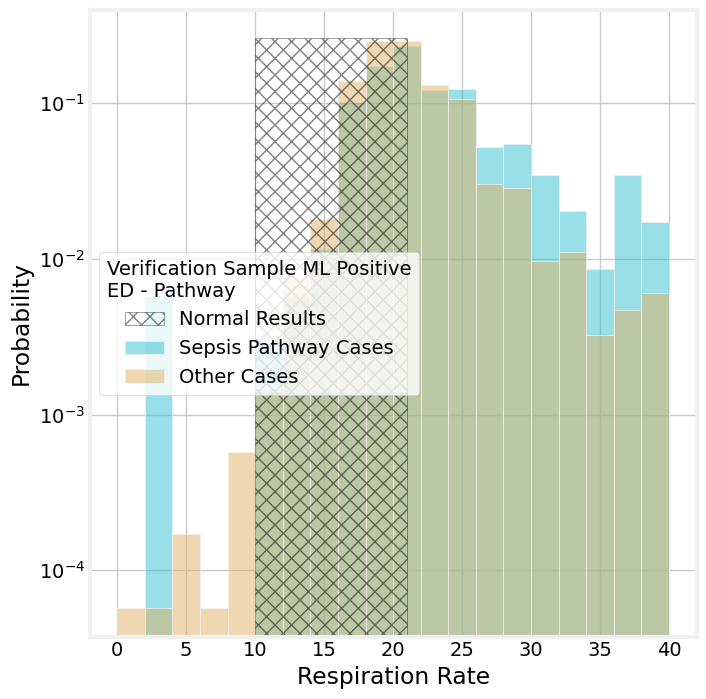

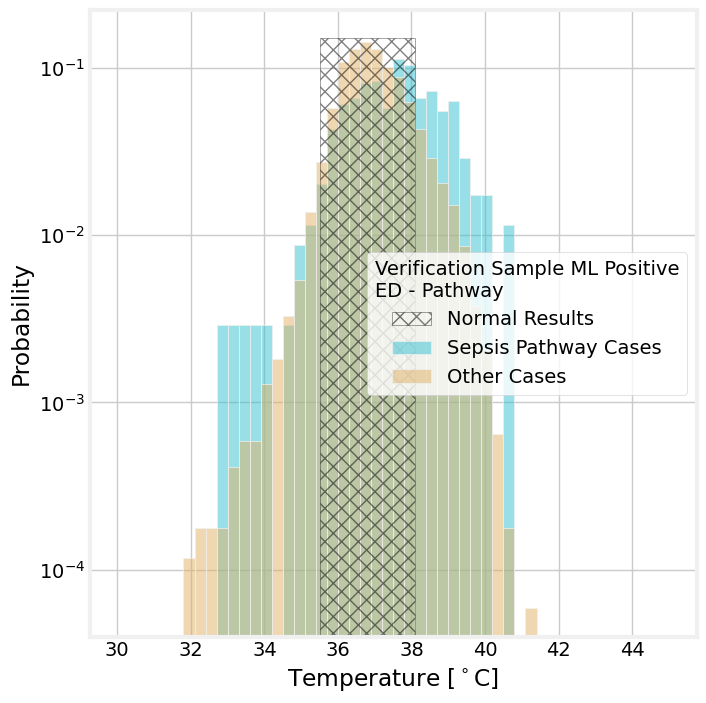

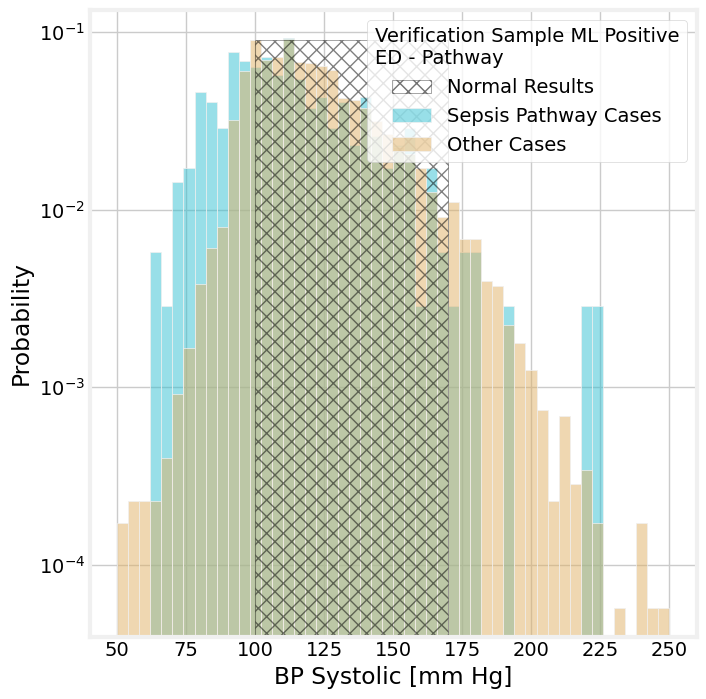

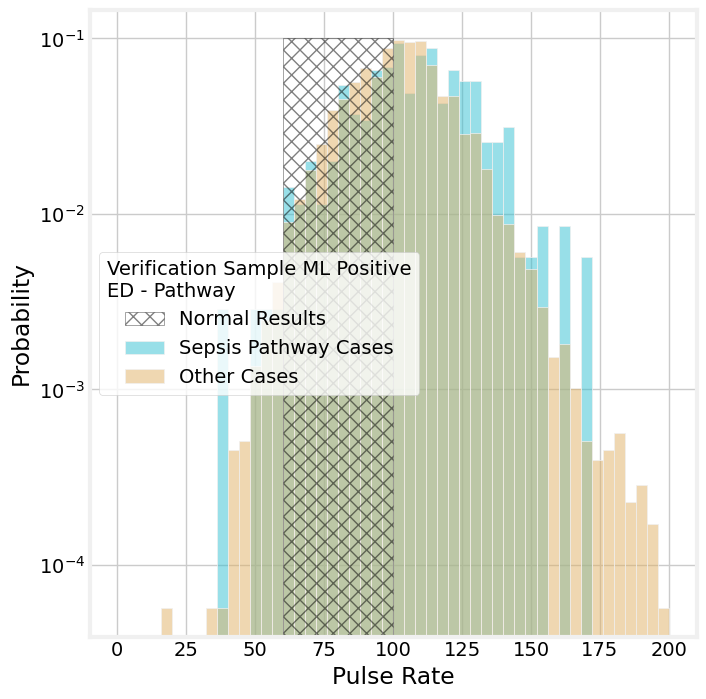

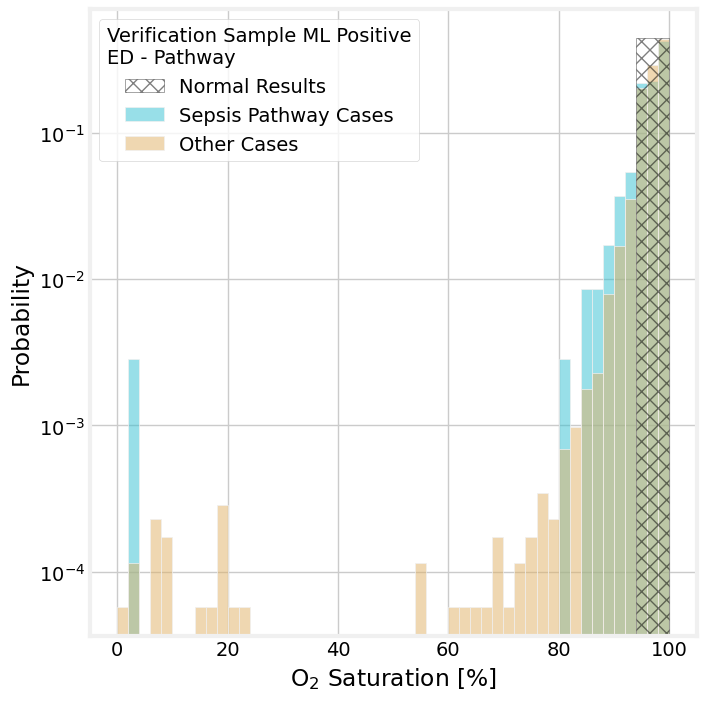

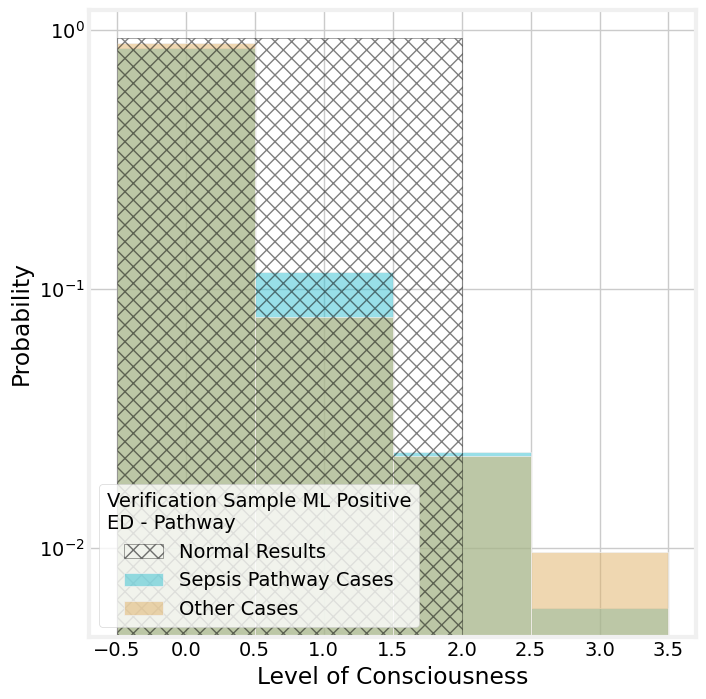

In [35]:
n_features = len(feat_importances.index)
n_features = min(n_features,10)
print(n_features)
for i in range(n_features): 
    item = feat_importances.feature.values[i]
    # print(i,item,X_valid[item].dtype,is_numeric_dtype(X_valid[item]))
    if item in X_valid.keys():
        if is_numeric_dtype(X_valid[item]):
            fig, ax = plt.subplots(figsize=(7, 7))
            fig.tight_layout() 
            plotSettingValues = plotSettings[item]
            
            hist = sns.histplot(data=Emergency_IPInfo_Complete_Numeric_tmp.loc[(~Emergency_IPInfo_Complete_Numeric_tmp[item].isna())&(Emergency_IPInfo_Complete_Numeric_tmp.MLFlag==1)], x=item,  stat= 'probability', bins=plotSettingValues[0], 
                label=plotSettingValues[4] , hue=DiagnosisString, palette={1: to_rgba("#32C0D2", 1), 0: to_rgba("#E0B165",1),}, #  color_dict,
                binrange=(plotSettingValues[1], plotSettingValues[2]), alpha=0.5, common_norm=False,)

            if plotSettingValues[5]:
                x1 = plotSettingValues[6]
                x2 = plotSettingValues[7]
                y = np.arange(0,ax.get_ylim()[1],0.01)
                ax.fill_betweenx(y,x1,x2, facecolor='none', edgecolor='black', hatch='xx',alpha=0.5, label='Normal Results')

            # print(hist.get_ylim())
            handles, labels  =  ax.get_legend_handles_labels()
            print(labels)
            if plotSettingValues[5]:
                ax.legend(handles, [ 'Normal Results', '{} Cases'.format(PlotString), 'Other Cases' ], loc='best',  title='Verification Sample ML Positive\nED - Pathway',alignment='center')
            else: 
                ax.legend(handles, ['{} Cases'.format(PlotString), 'Other Cases' ],  loc='best',  title='Verification Sample ML Positive\nED - Pathway',alignment='center')
            
            hist.plot()
            
            # print(ax.get_ylim())
            ax.set(xlabel=plotSettingValues[4])
            plt.yscale(plotSettingValues[3])

## Pathway Analysis 

In [36]:
df_verification['MLFlag'] = Emergency_IPInfo_Complete_Numeric_tmp['MLFlag']

In [37]:
NumberDiagnosisCases = len(Emergency_IPInfo_Complete_Numeric_tmp[Emergency_IPInfo_Complete_Numeric_tmp[DiagnosisString]==1])
NumberOtherCases = len(Emergency_IPInfo_Complete_Numeric_tmp[Emergency_IPInfo_Complete_Numeric_tmp[DiagnosisString]==0])

In [38]:
print(NumberDiagnosisCases)
print(NumberOtherCases)

466
106973


### qSOFA

In [39]:
qSOFAOnly =  len(df_verification.loc[(df_verification[DiagnosisString]==1)&(df_verification.qSOFAFlag==1)&(df_verification.MLFlag==0)].index)
MLOnly =  len(df_verification.loc[(df_verification[DiagnosisString]==1)&(df_verification.qSOFAFlag==0)&(df_verification.MLFlag==1)].index)



Both =  len(df_verification.loc[(df_verification[DiagnosisString]==1)&(df_verification.qSOFAFlag==1)&(df_verification.MLFlag==1)].index)
Neither =  len(df_verification.loc[(df_verification[DiagnosisString]==1)&(df_verification.qSOFAFlag==0)&(df_verification.MLFlag==0)].index)

print(qSOFAOnly,MLOnly,Both,Neither)

qSOFANumber =  len(df_verification.loc[(df_verification[DiagnosisString]==1)&(df_verification.qSOFAFlag==1)].index)
MLNumber = len(df_verification.loc[(df_verification[DiagnosisString]==1)&(df_verification.MLFlag==1)].index) 


print("The total number of qSOFA Pathway Positive Patients is = {}  ({:.2f})%".format(qSOFANumber, 100*(qSOFANumber/NumberDiagnosisCases)))
print("The total number of ML Pathway Positive Patients is = {} ({:.2f})%".format(MLNumber,100*MLNumber/NumberDiagnosisCases))


0 301 51 114
The total number of qSOFA Pathway Positive Patients is = 51  (10.94)%
The total number of ML Pathway Positive Patients is = 352 (75.54)%


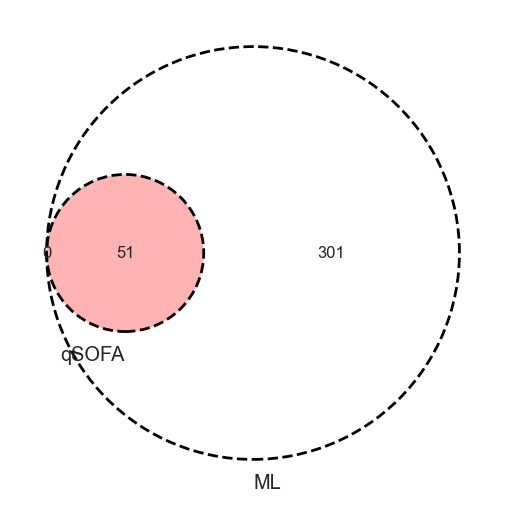

In [40]:
from matplotlib_venn import venn2, venn2_circles
sns.set(style="white", color_codes=False)
sns.set_palette("bright")
plt.figure(figsize=(6,6))
vSOFA = venn2(subsets=(qSOFAOnly, MLOnly, Both), set_labels = ('qSOFA', 'ML'), set_colors=("red", "white"),  alpha=1.0)
vSOFA.get_patch_by_id('10').set_alpha(0.7)
vSOFA.get_patch_by_id('10').set_color('red')
# v.get_patch_by_id('011').set_alpha(1.0)
# v.get_patch_by_id('011').set_color('red')
cSOFA = venn2_circles(subsets=(qSOFAOnly, MLOnly, Both), linestyle='dashed')
#venn3_circles(subsets=(PurpleOnly, RedOnly, PurpleAndRed, MLOnly, PurpleAndML, RedAndML, AllThree), linestyle='dashed')

In [41]:
qSOFAOnly =  len(df_verification.loc[(df_verification[DiagnosisString]==0)&(df_verification.qSOFAFlag==1)&(df_verification.MLFlag==0)].index)
MLOnly =  len(df_verification.loc[(df_verification[DiagnosisString]==0)&(df_verification.qSOFAFlag==0)&(df_verification.MLFlag==1)].index)



Both =  len(df_verification.loc[(df_verification[DiagnosisString]==0)&(df_verification.qSOFAFlag==1)&(df_verification.MLFlag==1)].index)
Neither =  len(df_verification.loc[(df_verification[DiagnosisString]==0)&(df_verification.qSOFAFlag==0)&(df_verification.MLFlag==0)].index)

print(qSOFAOnly,MLOnly,Both,Neither)

qSOFANumber =  len(df_verification.loc[(df_verification[DiagnosisString]==0)&(df_verification.qSOFAFlag==1)].index)
MLNumber = len(df_verification.loc[(df_verification[DiagnosisString]==0)&(df_verification.MLFlag==1)].index) 


print("The total number of qSOFA Pathway False Positive Patients is = {}  ({:.2f})%".format(qSOFANumber, 100*(qSOFANumber/NumberOtherCases)))
print("The total number of ML Pathway False Positive Patients is = {} ({:.2f})%".format(MLNumber,100*MLNumber/NumberOtherCases))


1 17305 357 89310
The total number of qSOFA Pathway False Positive Patients is = 358  (0.33)%
The total number of ML Pathway False Positive Patients is = 17662 (16.51)%


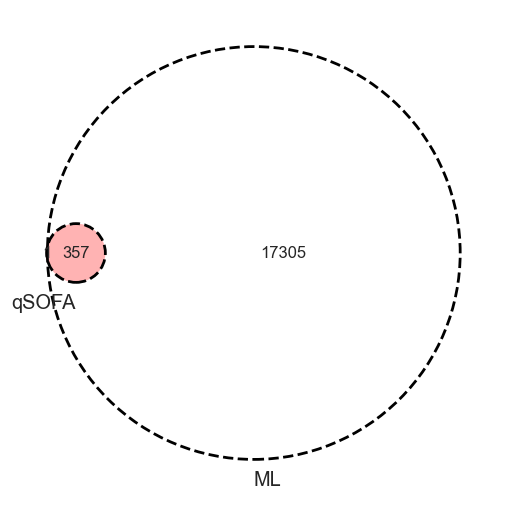

In [42]:
from matplotlib_venn import venn2, venn2_circles
sns.set(style="white", color_codes=False)
sns.set_palette("bright")
plt.figure(figsize=(6,6))
vSOFA = venn2(subsets=(qSOFAOnly, MLOnly, Both), set_labels = ('qSOFA', 'ML'), set_colors=("red", "white"),  alpha=1.0)
vSOFA.get_patch_by_id('10').set_alpha(0.7)
vSOFA.get_patch_by_id('10').set_color('red')
# v.get_patch_by_id('011').set_alpha(1.0)
# v.get_patch_by_id('011').set_color('red')
cSOFA = venn2_circles(subsets=(qSOFAOnly, MLOnly, Both), linestyle='dashed')
#venn3_circles(subsets=(PurpleOnly, RedOnly, PurpleAndRed, MLOnly, PurpleAndML, RedAndML, AllThree), linestyle='dashed')

In [43]:
thresh = qSOFANumber/NumberOtherCases
v,i = find_nearest(fpr,thresh)
print("{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}".format( thresh,tpr[i],fpr[i],thresholds[i]))
print("For a qSOFA False Negatiove Rate of {:.3f} the ML algorithm has a TP rate of {:.3f}.".format(thresh,tpr[i]))


# thresh = RedNumber/NumberOtherCases
# v,i = find_nearest(fpr,thresh)
# print("{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}".format( thresh,tpr[i],fpr[i],thresholds[i]))

0.003	0.201	0.003	0.113
For a qSOFA False Negatiove Rate of 0.003 the ML algorithm has a TP rate of 0.201.


### Diagnosis Flag  Positive 


In [44]:
PurpleOnly =  len(df_verification.loc[(df_verification[DiagnosisString]==1)&(~df_verification.RedFlag)&(df_verification.PurpleFlag)&(df_verification.MLFlag==0)].index)
RedOnly =  len(df_verification.loc[(df_verification[DiagnosisString]==1)&(df_verification.RedFlag)&(~df_verification.PurpleFlag)&(df_verification.MLFlag==0)].index)
MLOnly =  len(df_verification.loc[(df_verification[DiagnosisString]==1)&(~df_verification.RedFlag)&(~df_verification.PurpleFlag)&(df_verification.MLFlag==1)].index)

PurpleAndRed =  len(df_verification.loc[(df_verification[DiagnosisString]==1)&(df_verification.RedFlag)&(df_verification.PurpleFlag)&(df_verification.MLFlag==0)].index)
PurpleAndML =  len(df_verification.loc[(df_verification[DiagnosisString]==1)&(~df_verification.RedFlag)&(df_verification.PurpleFlag)&(df_verification.MLFlag==1)].index)
RedAndML =  len(df_verification.loc[(df_verification[DiagnosisString]==1)&(df_verification.RedFlag)&(~df_verification.PurpleFlag)&(df_verification.MLFlag==1)].index)

AllThree =  len(df_verification.loc[(df_verification[DiagnosisString]==1)&(df_verification.RedFlag)&(df_verification.PurpleFlag)&(df_verification.MLFlag==1)].index)

print(PurpleOnly,RedOnly,MLOnly,PurpleAndRed,PurpleAndML,RedAndML,AllThree)

PurpleNumber =   len(df_verification.loc[(df_verification[DiagnosisString]==1)&(df_verification.PurpleFlag)].index) # PurpleOnly+PurpleAndRed+PurpleAndML+AllThree
RedNumber = len(df_verification.loc[(df_verification[DiagnosisString]==1)&(df_verification.RedFlag)].index) 
MLNumber = len(df_verification.loc[(df_verification[DiagnosisString]==1)&(df_verification.MLFlag==1)].index) 


print("The total number of Purple Pathway Positive Patients is = {}  ({:.2f})%".format(PurpleNumber, 100*(PurpleNumber/NumberDiagnosisCases)))
print("The total number of Red Pathway Positive Patients is = {}  ({:.2f}%)".format(RedNumber,100*(RedNumber/NumberDiagnosisCases)))
print("The total number of ML Pathway Positive Patients is = {} ({:.2f})%".format(MLNumber,100*MLNumber/NumberDiagnosisCases))


6 2 137 3 55 37 123
The total number of Purple Pathway Positive Patients is = 187  (40.13)%
The total number of Red Pathway Positive Patients is = 165  (35.41%)
The total number of ML Pathway Positive Patients is = 352 (75.54)%


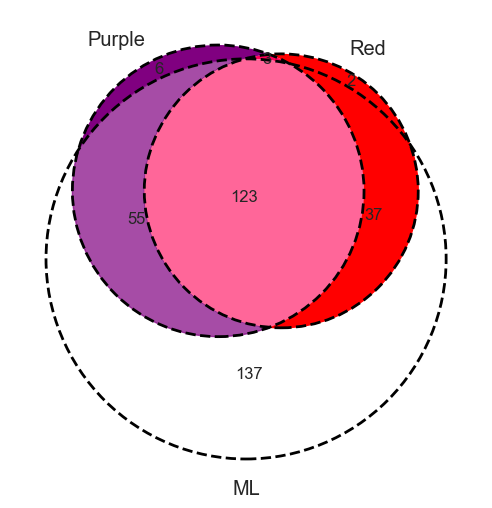

In [45]:
from matplotlib_venn import venn3, venn3_circles
sns.set(style="white", color_codes=False)
sns.set_palette("bright")
plt.figure(figsize=(6,6))
v = venn3(subsets=(PurpleOnly, RedOnly, PurpleAndRed, MLOnly, PurpleAndML, RedAndML, AllThree), set_labels = ('Purple', 'Red', 'ML'),
          set_colors=("purple", "red", "white"),  alpha=1.0)
v.get_patch_by_id('101').set_alpha(0.7)
v.get_patch_by_id('101').set_color('purple')
v.get_patch_by_id('011').set_alpha(1.0)
v.get_patch_by_id('011').set_color('red')
c = venn3_circles(subsets=(PurpleOnly, RedOnly, PurpleAndRed, MLOnly, PurpleAndML, RedAndML, AllThree), linestyle='dashed')

### Diagnosis Flag Negative 


In [46]:
PurpleOnly =  len(df_verification.loc[(df_verification[DiagnosisString]==0)&(~df_verification.RedFlag)&(df_verification.PurpleFlag)&(df_verification.MLFlag==0)].index)
RedOnly =  len(df_verification.loc[(df_verification[DiagnosisString]==0)&(df_verification.RedFlag)&(~df_verification.PurpleFlag)&(df_verification.MLFlag==0)].index)
MLOnly =  len(df_verification.loc[(df_verification[DiagnosisString]==0)&(~df_verification.RedFlag)&(~df_verification.PurpleFlag)&(df_verification.MLFlag==1)].index)

PurpleAndRed =  len(df_verification.loc[(df_verification[DiagnosisString]==0)&(df_verification.RedFlag)&(df_verification.PurpleFlag)&(df_verification.MLFlag==0)].index)
PurpleAndML =  len(df_verification.loc[(df_verification[DiagnosisString]==0)&(~df_verification.RedFlag)&(df_verification.PurpleFlag)&(df_verification.MLFlag==1)].index)
RedAndML =  len(df_verification.loc[(df_verification[DiagnosisString]==0)&(df_verification.RedFlag)&(~df_verification.PurpleFlag)&(df_verification.MLFlag==1)].index)

AllThree =  len(df_verification.loc[(df_verification[DiagnosisString]==0)&(df_verification.RedFlag)&(df_verification.PurpleFlag)&(df_verification.MLFlag==1)].index)

print(PurpleOnly,RedOnly,MLOnly,PurpleAndRed,PurpleAndML,RedAndML,AllThree)

PurpleNumber =   len(df_verification.loc[(df_verification[DiagnosisString]==0)&(df_verification.PurpleFlag)].index) # PurpleOnly+PurpleAndRed+PurpleAndML+AllThree
RedNumber = len(df_verification.loc[(df_verification[DiagnosisString]==0)&(df_verification.RedFlag)].index) 
MLNumber = len(df_verification.loc[(df_verification[DiagnosisString]==0)&(df_verification.MLFlag==1)].index) 


print("The total number of Purple Pathway Positive Patients is = {}  ({:.2f})%".format(PurpleNumber, 100*(PurpleNumber/NumberOtherCases)))
print("The total number of Red Pathway Positive Patients is = {}  ({:.2f}%)".format(RedNumber,100*(RedNumber/NumberOtherCases)))
print("The total number of ML Pathway Positive Patients is = {} ({:.2f})%".format(MLNumber,100*MLNumber/NumberOtherCases))



1220 198 12461 240 2788 965 1448
The total number of Purple Pathway Positive Patients is = 5696  (5.32)%
The total number of Red Pathway Positive Patients is = 2851  (2.67%)
The total number of ML Pathway Positive Patients is = 17662 (16.51)%


In [47]:
## False Positive Rate of 10% corresponding to purple pathway and 6% corresponding to red pathway 

thresh = PurpleNumber/NumberOtherCases
v,i = find_nearest(fpr,thresh)
print("{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}".format( thresh,tpr[i],fpr[i],thresholds[i]))

thresh = RedNumber/NumberOtherCases
v,i = find_nearest(fpr,thresh)
print("{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}".format( thresh,tpr[i],fpr[i],thresholds[i]))

0.053	0.597	0.053	0.012
0.027	0.468	0.027	0.022


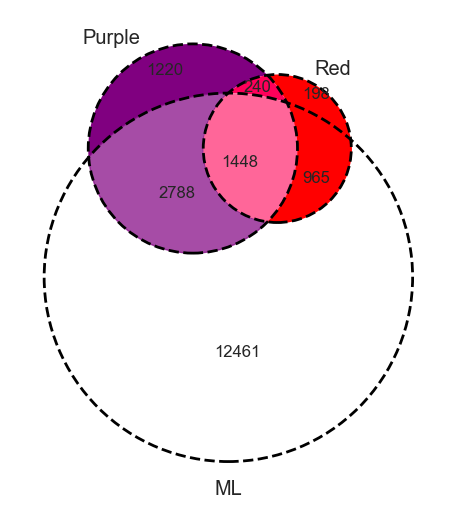

In [48]:
from matplotlib_venn import venn3, venn3_circles
sns.set(style="white", color_codes=False)
sns.set_palette("bright")
plt.figure(figsize=(6,6))
v = venn3(subsets=(PurpleOnly, RedOnly, PurpleAndRed, MLOnly, PurpleAndML, RedAndML, AllThree), set_labels = ('Purple', 'Red', 'ML'),
          set_colors=("purple", "red", "white"),  alpha=1.0)
v.get_patch_by_id('101').set_alpha(0.7)
v.get_patch_by_id('101').set_color('purple')
v.get_patch_by_id('011').set_alpha(1.0)
v.get_patch_by_id('011').set_color('red')
c = venn3_circles(subsets=(PurpleOnly, RedOnly, PurpleAndRed, MLOnly, PurpleAndML, RedAndML, AllThree), linestyle='dashed')

False Negatives 

In [49]:
PurpleOnly =  len(df_verification.loc[(df_verification[DiagnosisString]==1)&(~df_verification.RedFlag)&(df_verification.PurpleFlag)&(df_verification.MLFlag==0)].index)
RedOnly =  len(df_verification.loc[(df_verification[DiagnosisString]==1)&(df_verification.RedFlag)&(~df_verification.PurpleFlag)&(df_verification.MLFlag==0)].index)
MLOnly =  len(df_verification.loc[(df_verification[DiagnosisString]==1)&(~df_verification.RedFlag)&(~df_verification.PurpleFlag)&(df_verification.MLFlag==0)].index)

PurpleAndRed =  len(df_verification.loc[(df_verification[DiagnosisString]==1)&(df_verification.RedFlag)&(df_verification.PurpleFlag)&(df_verification.MLFlag==0)].index)
PurpleAndML =  len(df_verification.loc[(df_verification[DiagnosisString]==1)&(~df_verification.RedFlag)&(df_verification.PurpleFlag)&(df_verification.MLFlag==0)].index)
RedAndML =  len(df_verification.loc[(df_verification[DiagnosisString]==1)&(df_verification.RedFlag)&(~df_verification.PurpleFlag)&(df_verification.MLFlag==0)].index)

AllThree =  len(df_verification.loc[(df_verification[DiagnosisString]==1)&((df_verification.RedFlag)|(df_verification.PurpleFlag))&(df_verification.MLFlag==0)].index)

print(PurpleOnly,RedOnly,MLOnly,PurpleAndRed,PurpleAndML,RedAndML,AllThree)

PurpleNumber =   len(df_verification.loc[(df_verification[DiagnosisString]==1)&(df_verification.PurpleFlag)].index) # PurpleOnly+PurpleAndRed+PurpleAndML+AllThree
RedNumber = len(df_verification.loc[(df_verification[DiagnosisString]==1)&(df_verification.RedFlag)].index) 
MLNumber = len(df_verification.loc[(df_verification[DiagnosisString]==1)&(df_verification.MLFlag==0)].index) 


print("The total number of Purple Pathway Positive Patients is = {}  ({:.2f})%".format(PurpleNumber, 100*(PurpleNumber/NumberOtherCases)))
print("The total number of Red Pathway Positive Patients is = {}  ({:.2f}%)".format(RedNumber,100*(RedNumber/NumberOtherCases)))
print("The total number of ML Pathway Positive Patients is = {} ({:.2f})%".format(MLNumber,100*MLNumber/NumberOtherCases))

print("The total number of ML False Negative that are Purple or Red is = ({})".format(AllThree))



6 2 103 3 6 2 11
The total number of Purple Pathway Positive Patients is = 187  (0.17)%
The total number of Red Pathway Positive Patients is = 165  (0.15%)
The total number of ML Pathway Positive Patients is = 114 (0.11)%
The total number of ML False Negative that are Purple or Red is = (11)


## Overlaps

In [50]:
diagnosis_code_df = pd.read_csv("./_DIM_Diagnosis_Codes__202405071653.csv")

In [51]:
idx = df_verification.loc[(df_verification[DiagnosisString]==1)&(df_verification.MLFlag)].index

print("PneumoniaFlag Purple Flag = {:.1%}".format(len(df.loc[idx].loc[df.PneumoniaFlag==1].index)/len(idx)))
print("UTIFlag Purple Flag = {:.1%}".format(len(df.loc[idx].loc[df.UTIFlag==1].index)/len(idx)))
print("HeartFailureFlag Purple Flag {:.1%}".format(len(df.loc[idx].loc[df.HeartFailureFlag==1].index)/len(idx)))
print("COPDFlag Purple Flag = {:.1%}".format(len(df.loc[idx].loc[df.COPDFlag==1].index)/len(idx)))
print("PEFlag Purple Flag = {:.1%}".format(len(df.loc[idx].loc[df.PEFlag==1].index)/len(idx)))


print("All Flags = {:.1%} \n\n".format(len(df.loc[idx].loc[(df.COPDFlag==1) | (df.PEFlag==1) | (df.HeartFailureFlag==1) | (df.UTIFlag==1) | (df.PneumoniaFlag==1) ].index)/len(idx)))

idx_Sepsis = idx 


lst = df.loc[idx_Sepsis]['PrimaryDiagnosisCode'].astype(str).values #.tolist()
diagnoses =  df.loc[idx_Sepsis].pivot_table(columns=['PrimaryDiagnosisCode'], aggfunc='size')
diagnoses = diagnoses.sort_values(ascending=False)
# diagnoses.head(20)
for i, v in diagnoses.head(10).items():
    try: 
        desc = diagnosis_code_df[diagnosis_code_df["diagnosis_code"]==i].diagnosis_code_desc.values[0]
    except:
        desc = "Unknown"

    print("{}\t{}\t{}".format(i,desc,v))

PneumoniaFlag Purple Flag = 30.7%
UTIFlag Purple Flag = 21.3%
HeartFailureFlag Purple Flag 13.9%
COPDFlag Purple Flag = 5.1%
PEFlag Purple Flag = 3.7%
All Flags = 59.1% 


A419	Sepsis, unspecified	58
A4151	Sepsis dt Escherichia coli (E coli)	18
J189	Pneumonia unspecified	15
L0313	Cellulitis Of Lower Limb	9
N12	Tubulo-interstitial nephritis NOS	9
N390	Urinary tract infection site not spec	9
J159	Bacterial pneumonia unspecified	6
A410	Sepsis due to Staphylococcus aureus	6
A418	Other specified sepsis	5
J690	Pneumonitis due to food and vomit	5


In [52]:
# Sepsis Positive False Negatives 

idx = df_verification.loc[(df_verification[DiagnosisString]==1)&(~df_verification.MLFlag)].index

print(len(idx))

print("PneumoniaFlag Purple Flag = {:.1%}".format(len(df.loc[idx].loc[df.PneumoniaFlag==1].index)/len(idx)))
print("UTIFlag Purple Flag = {:.1%}".format(len(df.loc[idx].loc[df.UTIFlag==1].index)/len(idx)))
print("HeartFailureFlag Purple Flag {:.1%}".format(len(df.loc[idx].loc[df.HeartFailureFlag==1].index)/len(idx)))
print("COPDFlag Purple Flag = {:.1%}".format(len(df.loc[idx].loc[df.COPDFlag==1].index)/len(idx)))
print("PEFlag Purple Flag = {:.1%}".format(len(df.loc[idx].loc[df.PEFlag==1].index)/len(idx)))


print("All Flags = {:.1%}\n\n".format(len(df.loc[idx].loc[(df.COPDFlag==1) | (df.PEFlag==1) | (df.HeartFailureFlag==1) | (df.UTIFlag==1) | (df.PneumoniaFlag==1) ].index)/len(idx)))

idx_Sepsis_fp = idx 

lst = df.loc[idx_Sepsis_fp]['PrimaryDiagnosisCode'].astype(str).values #.tolist()
diagnoses =  df.loc[idx_Sepsis_fp].pivot_table(columns=['PrimaryDiagnosisCode'], aggfunc='size')
diagnoses = diagnoses.sort_values(ascending=False)
# diagnoses.head(20)
for i, v in diagnoses.head(5).items():
    try: 
        desc = diagnosis_code_df[diagnosis_code_df["diagnosis_code"]==i].diagnosis_code_desc.values[0]
    except:
        desc = "Unknown"

    print("{}\t{}\t{}".format(i,desc,v))

114
PneumoniaFlag Purple Flag = 16.7%
UTIFlag Purple Flag = 18.4%
HeartFailureFlag Purple Flag 13.2%
COPDFlag Purple Flag = 4.4%
PEFlag Purple Flag = 0.9%
All Flags = 40.4%


A419	Sepsis, unspecified	14
O85	Puerperal sepsis	7
N390	Urinary tract infection site not spec	4
N136	Pyonephrosis	3
A4158	Sepsis dt other gram neg organisms	3


In [53]:
# Sepsis Negative 

idx = df_verification.loc[(df_verification[DiagnosisString]==0)&(df_verification.MLFlag)].index

print("PneumoniaFlag Purple Flag = {:.1%}".format(len(df.loc[idx].loc[df.PneumoniaFlag==1].index)/len(idx)))
print("UTIFlag Purple Flag = {:.1%}".format(len(df.loc[idx].loc[df.UTIFlag==1].index)/len(idx)))
print("HeartFailureFlag Purple Flag {:.1%}".format(len(df.loc[idx].loc[df.HeartFailureFlag==1].index)/len(idx)))
print("COPDFlag Purple Flag = {:.1%}".format(len(df.loc[idx].loc[df.COPDFlag==1].index)/len(idx)))
print("PEFlag Purple Flag = {:.1%}".format(len(df.loc[idx].loc[df.PEFlag==1].index)/len(idx)))


print("All Flags = {:.1%}\n\n\n".format(len(df.loc[idx].loc[(df.COPDFlag==1) | (df.PEFlag==1) | (df.HeartFailureFlag==1) | (df.UTIFlag==1) | (df.PneumoniaFlag==1) ].index)/len(idx)))
idx_Other = idx 


lst = df.loc[idx_Other]['PrimaryDiagnosisCode'].astype(str).values #.tolist()
diagnoses =  df.loc[idx_Other].pivot_table(columns=['PrimaryDiagnosisCode'], aggfunc='size')
diagnoses = diagnoses.sort_values(ascending=False)
# diagnoses.head(20)

for i, v in diagnoses.head(10).items():
    try: 
        desc = diagnosis_code_df[diagnosis_code_df["diagnosis_code"]==i].diagnosis_code_desc.values[0]
    except:
        desc = "Unknown"

    print("{}\t{}\t{}".format(i,desc,v))

PneumoniaFlag Purple Flag = 5.7%
UTIFlag Purple Flag = 2.4%
HeartFailureFlag Purple Flag 2.6%
COPDFlag Purple Flag = 3.3%
PEFlag Purple Flag = 0.7%
All Flags = 12.3%



	Unknown	8870
J189	Pneumonia unspecified	195
J440	COPD with acute lower resp infection	184
J459	Asthma unspecified	164
F1551	Ment beh disrd stimt psych disrd mamph	135
J441	COPD with acute exacerbation unspecified	126
F100	Ment & beh disrd dt alcohol use ac intox	115
J157	Pneumonia dt Mycoplasma pneumoniae	114
N390	Urinary tract infection site not spec	109
F103	Ment & beh disrd dt alco use withdr st	106


In [54]:
len(df.loc[(idx_Other)].loc[(~df.InitialIPLoS.isna())].index)

8822

In [55]:
len(df.loc[(idx_Other)].loc[(df.InitialIPLoS>24)].index)

5134